In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_rows', 500)
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# General overview

Diverse Generative ML Benchmark (DIGEN) is a collection of datasets differentiating top ML methods, a PyPI package to simplify benchmarking and a Docker container for reproducibility of the results. 

In this tutorial we will show some basic commands and will demonstrate how to use the package, inspect datasets in more details and benchmark your methods against DIGEN.

In [2]:
#Import a package and initialize the benchmark
from digen import Benchmark
benchmark=Benchmark()

In [3]:
#Show which methods were benchmarked
benchmark.list_methods()

['DecisionTreeClassifier',
 'GradientBoostingClassifier',
 'KNeighborsClassifier',
 'LGBMClassifier',
 'LogisticRegression',
 'RandomForestClassifier',
 'SVC',
 'XGBClassifier']

In [4]:
#Check the datasets included in the release. Note that the datasets come in the following format:
#digen[NUMBER]_[SEED], where:
#NUMBER - is an identifier of a dataset, and 
#SEED - a random seed used to generate the dataset
benchmark.list_datasets()

['digen8_4426',
 'digen32_5191',
 'digen39_5578',
 'digen36_466',
 'digen13_769',
 'digen35_4426',
 'digen1_6265',
 'digen10_8322',
 'digen23_5191',
 'digen22_2433',
 'digen24_2433',
 'digen3_769',
 'digen17_6949',
 'digen26_7270',
 'digen7_6949',
 'digen16_5390',
 'digen27_860',
 'digen37_769',
 'digen12_8322',
 'digen6_466',
 'digen25_2433',
 'digen34_769',
 'digen31_2433',
 'digen33_769',
 'digen38_4426',
 'digen28_769',
 'digen40_5390',
 'digen2_6949',
 'digen4_860',
 'digen14_769',
 'digen29_8322',
 'digen21_6265',
 'digen15_5311',
 'digen19_7270',
 'digen5_6949',
 'digen11_7270',
 'digen9_7270',
 'digen20_5191',
 'digen18_5578',
 'digen30_4426']

In [5]:
#Show how the ground truth (i.e. how the endpoint of each of the datasets was created)
benchmark.get_models()

{'digen8_4426': 'safeDiv(X0, mul(X5, X2))',
 'digen32_5191': 'mul(X3, mul(X1, min(X9, X6)))',
 'digen39_5578': 'lt(mul(X7, X9), mul(X4, X0))',
 'digen36_466': 'ne(lt(X5, X3), gt(X6, X8))',
 'digen13_769': 'le(add(mul(X7, X9), mul(1.0, mul(X0, X8))), safeDiv(gt(min(sub(X1, X7), mul(safeDiv(X4, X9), sub(X1, X3))), le(X2, safeDiv(X5, eq(X8, X8)))), X0))',
 'digen35_4426': 'safeDiv(add(X7, lt(X6, safeDiv(0.0, X5))), safeDiv(X0, safeDiv(1.0, X8)))',
 'digen1_6265': 'lt(add(add(X2, X9), safeDiv(X7, 1.0)), X1)',
 'digen10_8322': 'mul(ne(X0, 1.0), eq(lt(X9, X2), lt(X5, X0)))',
 'digen23_5191': 'safeDiv(mul(safeDiv(X1, le(X9, X9)), X7), X3)',
 'digen22_2433': 'le(eq(X6, X0), safeDiv(X4, X3))',
 'digen24_2433': 'safeDiv(safeDiv(X0, X2), min(X4, X8))',
 'digen3_769': 'ge(sub(X4, X7), sub(X8, X5))',
 'digen17_6949': 'safeDiv(sub(add(X3, 0.0), safeDiv(X7, X5)), X3)',
 'digen26_7270': 'mul(min(X1, X7), safeDiv(X6, X8))',
 'digen7_6949': 'safeDiv(X0, safeDiv(X5, X8))',
 'digen16_5390': 'ne(lt(X3, X9)

# Exploring DIGEN

First, let's take a look at the datasets and the performance of the methods using a heatmap and parallel coordinate plots.

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  
C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


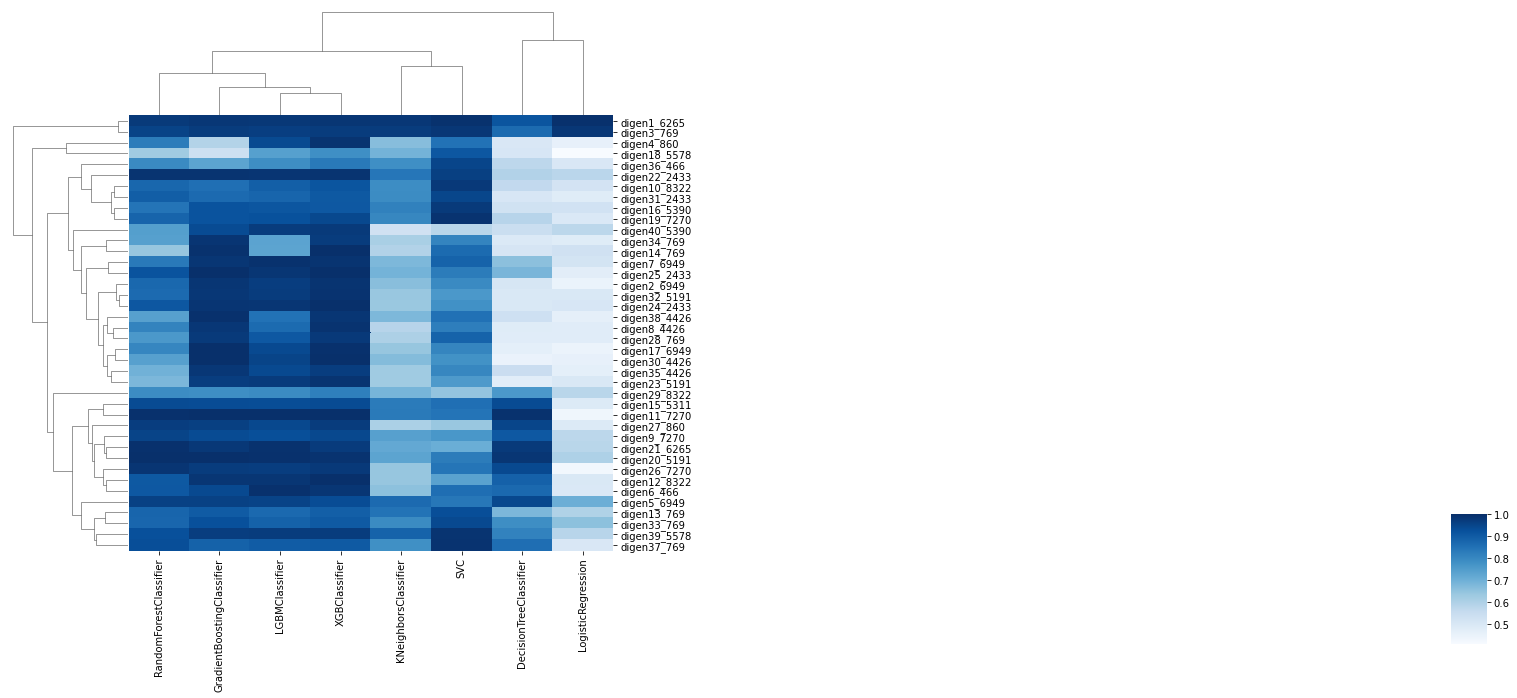

In [6]:
fig,ax=benchmark.plot_heatmap()# datasets=['digen20_5191', 'digen18_5578',  'digen30_4426'])
#ax.set_xlabel("Recall value", fontsize=12)
#plt.ylabel("labels on x axis") 
xx = fig.ax_heatmap.set_xlabel('')
xx = fig.ax_heatmap.set_ylabel('')
col=fig.cax.get_position()
fig.cax.set_position([col.x0+1, col.y0-0.35, col.width, col.height])
plt.savefig('heatmap.eps', bbox_inches='tight')

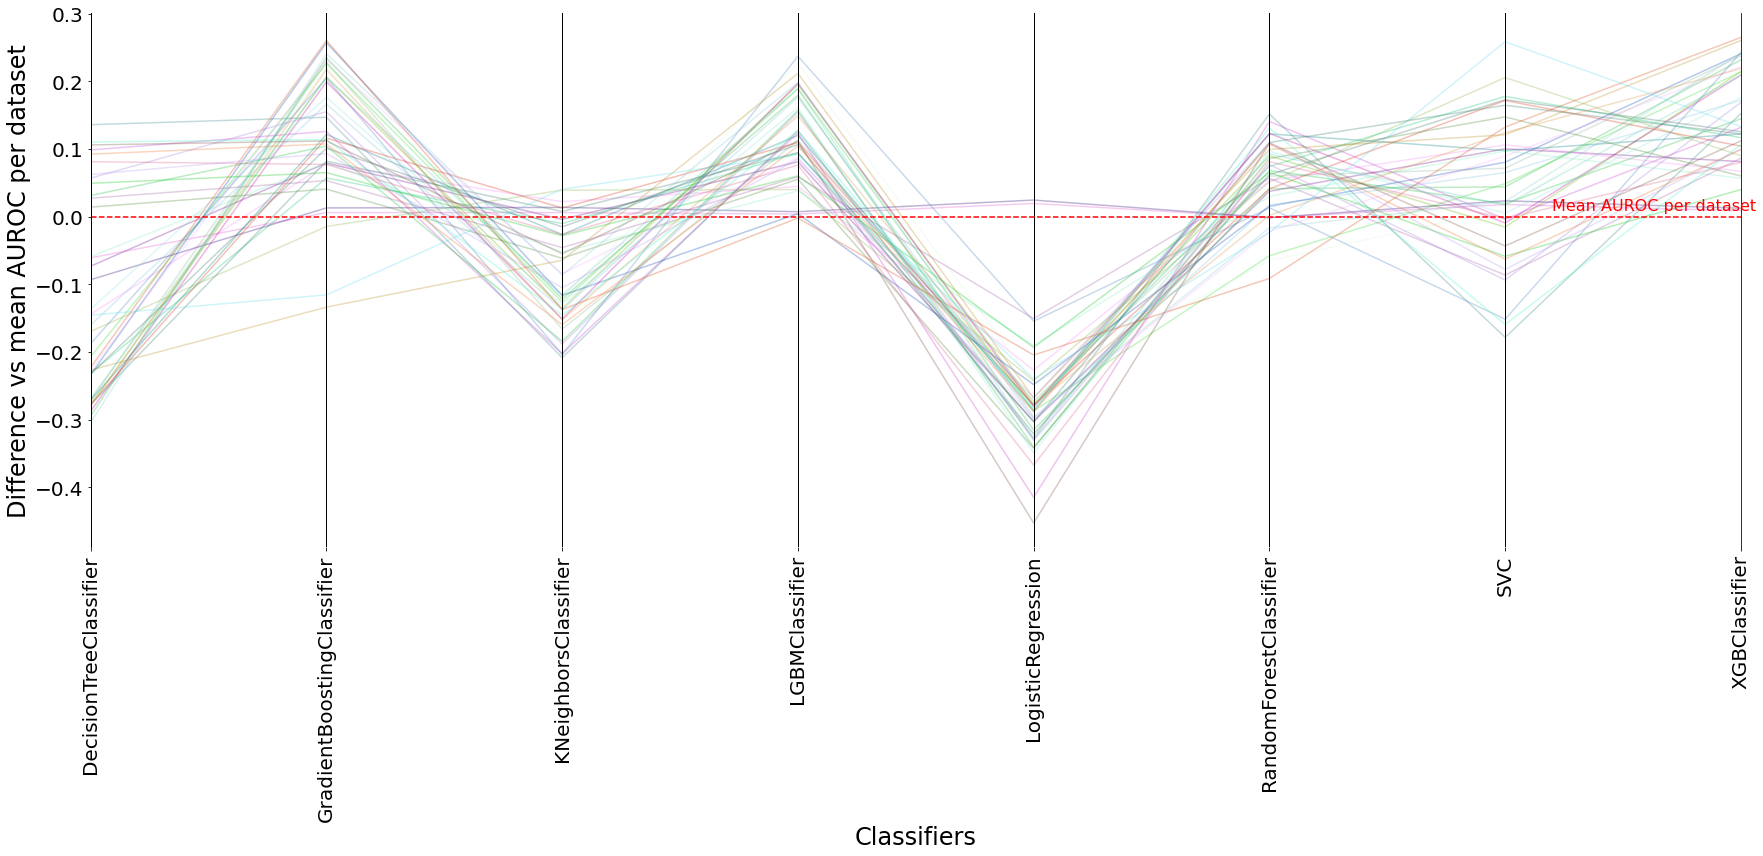

In [7]:
fig, ax=benchmark.plot_parallel_coordinates()
#plt.savefig('parallel.eps', bbox_inches='tight')

We can further investigate interesting dataset(s) by subsetting them using a single dataset or a list of datasets. 

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\pylabtools.py:132: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  fig.canvas.print_figure(bytes_io, **kw)


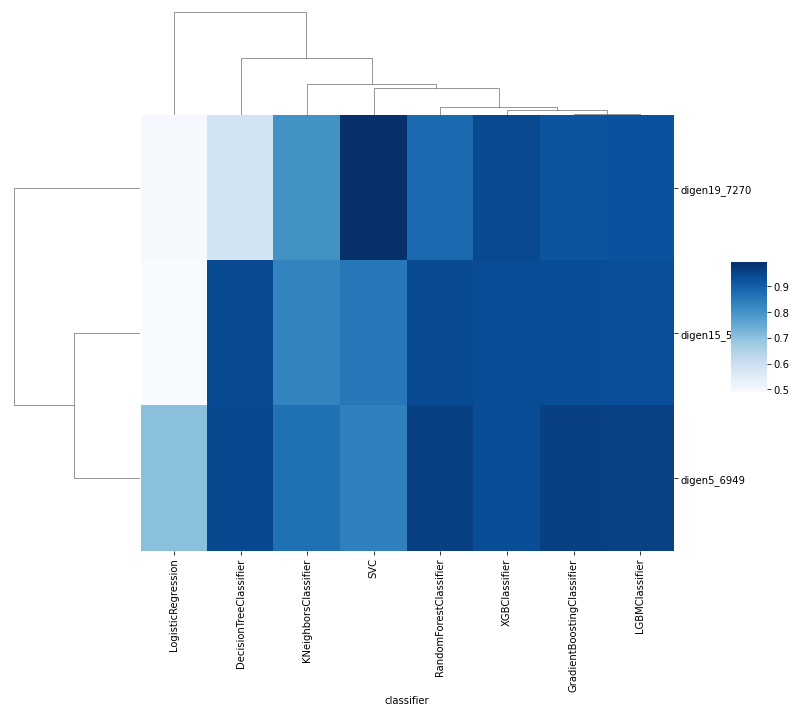

In [8]:
fig, ax=benchmark.plot_heatmap(datasets=['digen15_5311','digen19_7270','digen5_6949'])

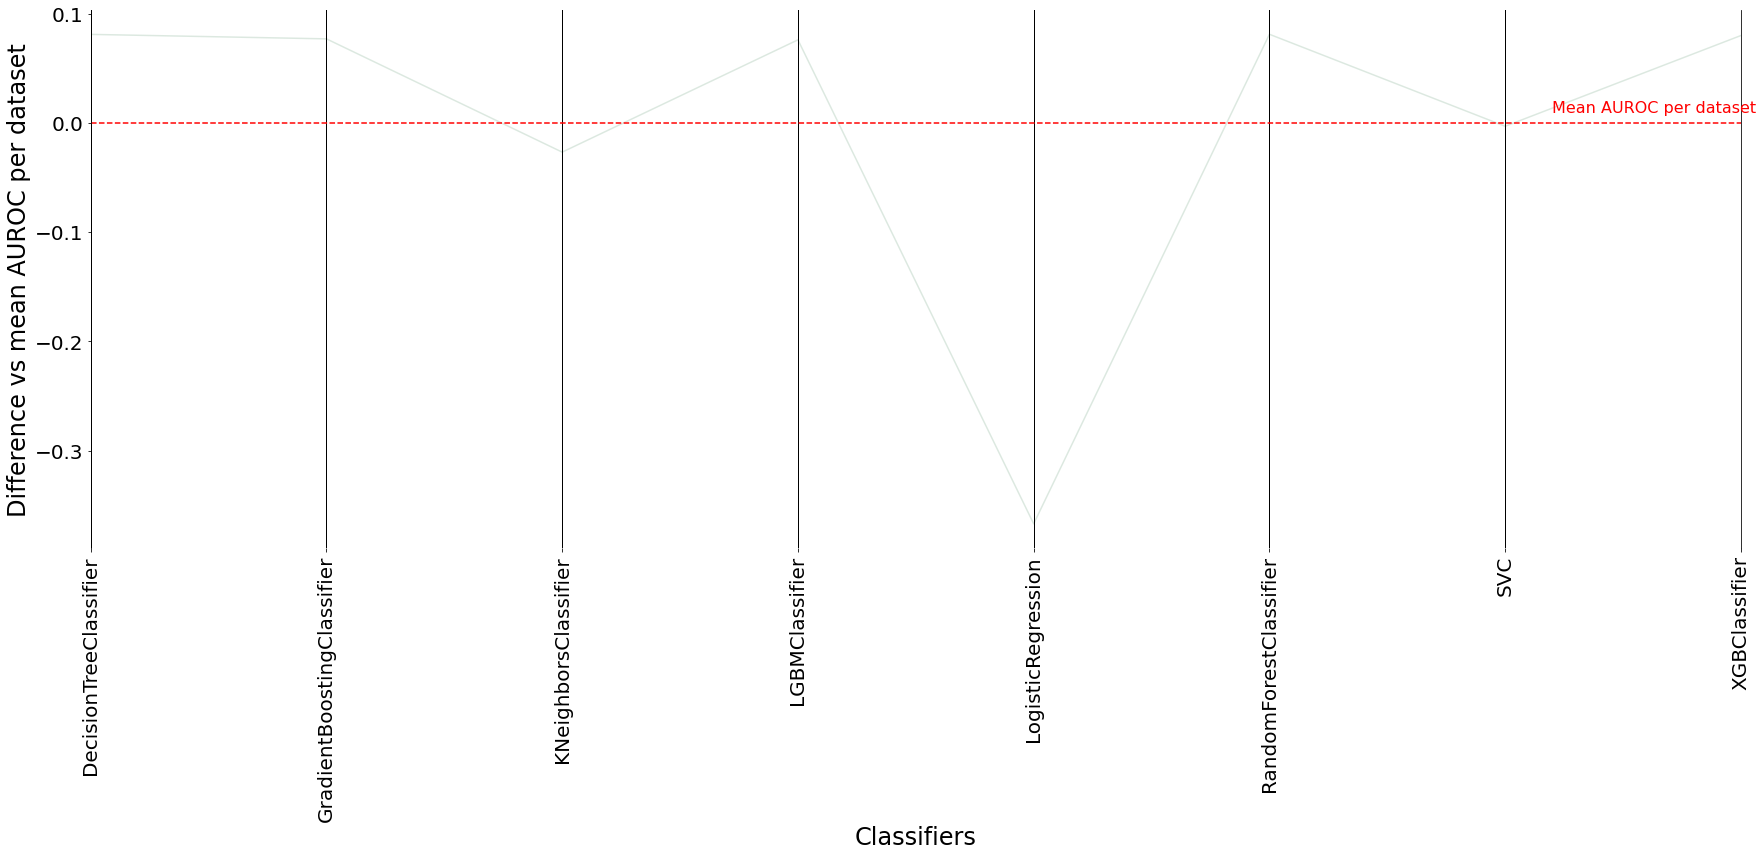

In [9]:
fig, ax=benchmark.plot_parallel_coordinates(datasets='digen15_5311')

We can investigate Receiver Operating Characteristic and Precision-Recall curves for a given dataset for the methods 

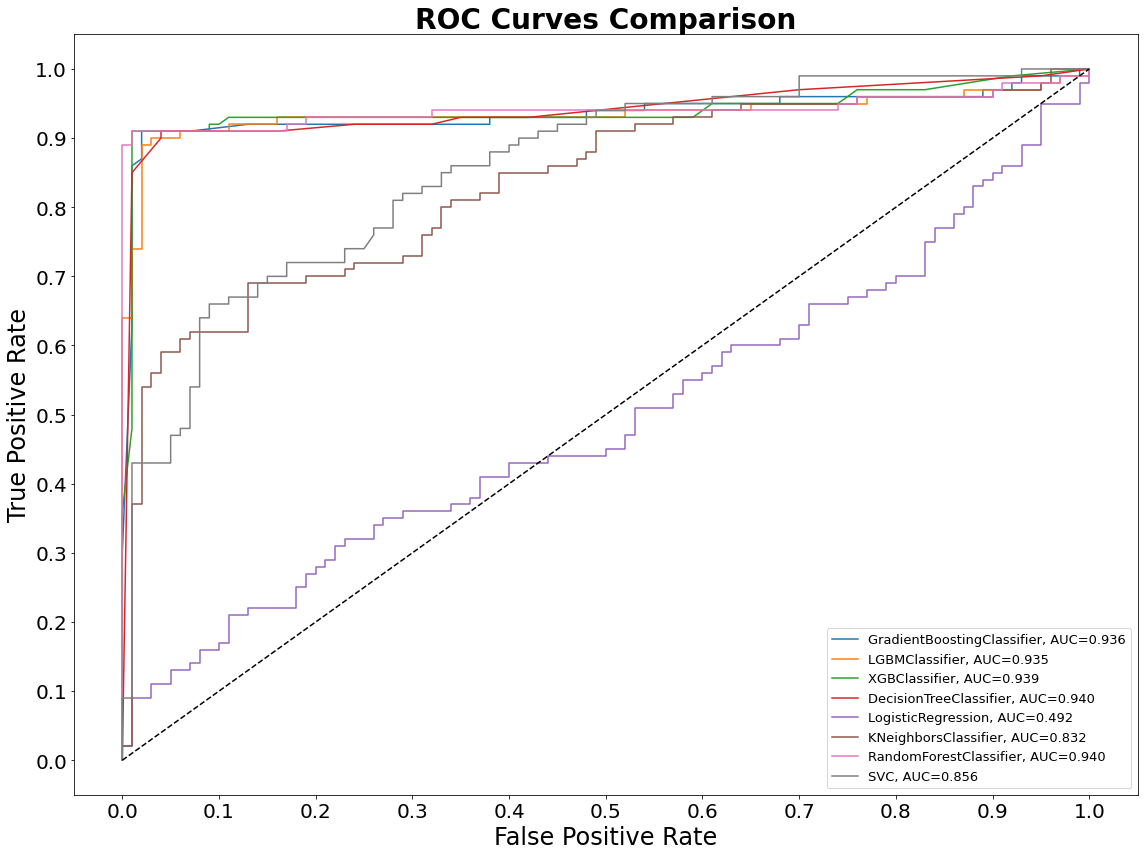

In [10]:
fig,ax=benchmark.plot_roc(dataset_name='digen15_5311')

We can easily modify default charts using Matplotlib API

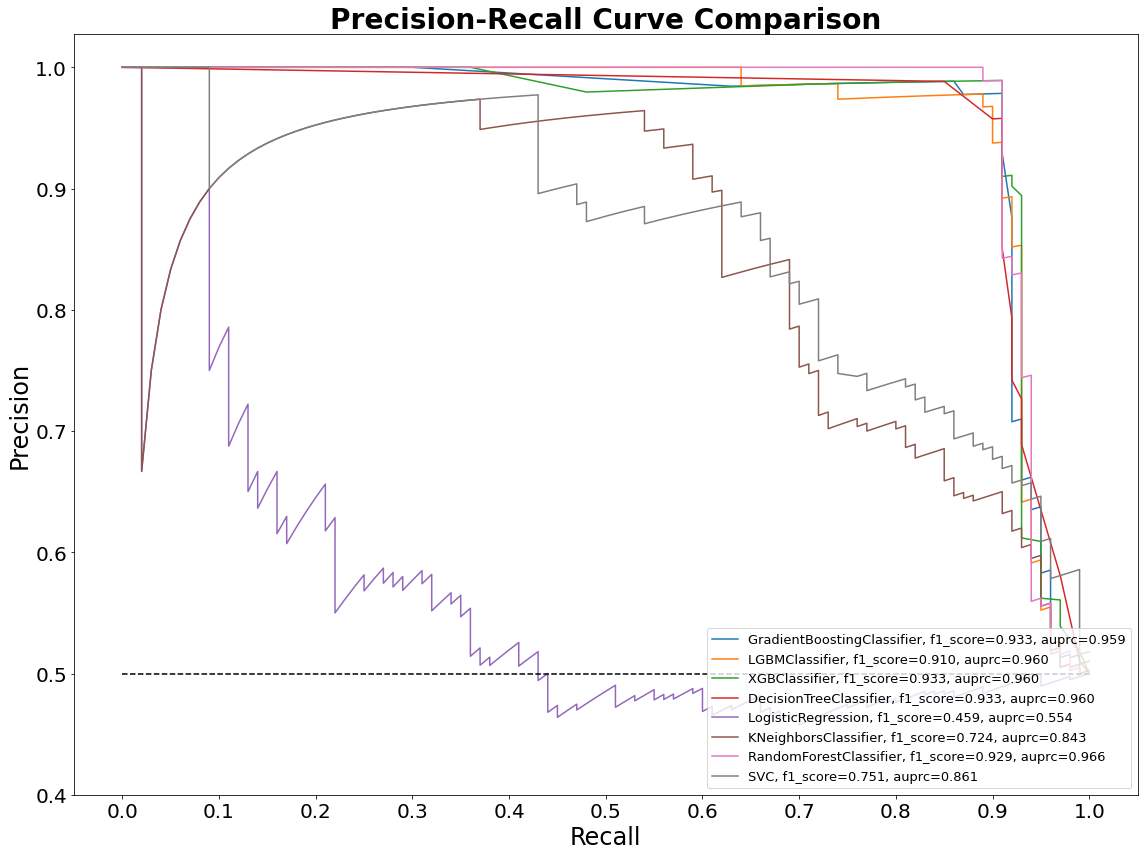

In [11]:
fig,ax=benchmark.plot_prc(dataset_name='digen15_5311')

# Benchmarking vs DIGEN

Our goal now is to benchmark a new method vs DIGEN. 
If reproducibility is important, please use our Docker container. Otherwise, follow those steps:

In [12]:
from sklearn.ensemble import ExtraTreesClassifier
est=ExtraTreesClassifier()


Here we evaluate a method with default parameters on one of the datasets. 
No optimization is performed, just checking the performance.    

In [13]:
results=benchmark.evaluate(est=est,datasets='digen30_4426',local_cache_dir='C:/Users/patrick/Desktop/datascience/digen/datasets/')


In [14]:
results

{'digen30_4426': {'dataset': 'digen30_4426',
  'classifier': ExtraTreesClassifier(),
  'fpr': array([0.  , 0.  , 0.01, 0.01, 0.01, 0.01, 0.05, 0.07, 0.1 , 0.13, 0.14,
         0.16, 0.19, 0.22, 0.28, 0.29, 0.31, 0.33, 0.4 , 0.45, 0.47, 0.5 ,
         0.52, 0.57, 0.59, 0.62, 0.69, 0.74, 0.8 , 0.85, 0.87, 0.89, 0.93,
         0.96, 0.97, 0.97, 0.98, 1.  , 1.  ]),
  'tpr': array([0.  , 0.01, 0.01, 0.03, 0.05, 0.06, 0.06, 0.09, 0.12, 0.16, 0.19,
         0.23, 0.29, 0.31, 0.36, 0.38, 0.44, 0.45, 0.53, 0.58, 0.62, 0.66,
         0.69, 0.7 , 0.76, 0.79, 0.81, 0.84, 0.86, 0.91, 0.92, 0.94, 0.95,
         0.97, 0.97, 0.99, 0.99, 0.99, 1.  ]),
  'prec': array([0.5       , 0.49748744, 0.50253807, 0.50510204, 0.5       ,
         0.50259067, 0.50531915, 0.5136612 , 0.51396648, 0.51704545,
         0.51807229, 0.53164557, 0.54      , 0.56028369, 0.56296296,
         0.5511811 , 0.57024793, 0.56896552, 0.56880734, 0.5631068 ,
         0.56989247, 0.57692308, 0.58666667, 0.56716418, 0.5625    ,
    

For any new method we need to specify the hyper-parameters distributions. 

Please refer to Optuna's Trial class to suggest values for each of the hyperparameters:
https://optuna.readthedocs.io/en/stable/reference/generated/optuna.trial.Trial.html#optuna.trial.Trial

In [16]:

from digen import defaults

def params_ExtraTreesClassifier(trial):
    params={
        'n_estimators' : trial.suggest_int('n_estimators',10,100),
        'criterion' : trial.suggest_categorical(name='criterion',choices=['gini', 'entropy']),
        'max_depth' : trial.suggest_int('max_depth', 1, 10),
    }
    return params



Now it is time to run extensive tests of the method, which include running 200 optimizations per each of the DIGEN's datasets:

In [17]:
from digen import defaults
import pickle

results=benchmark.optimize(est=est,parameter_scopes=params_ExtraTreesClassifier, storage='sqlite:///test.db',local_cache_dir='C:/Users/patrick/Desktop/datascience/digen/datasets/')
#Save the results to pickle
pickle.dump( results, open( "test.pkl", "wb" ) )

Optimizing ExtraTreesClassifier on digen8_4426


[I 2021-05-15 00:23:25,146] A new study created in RDB with name: digen8_4426-ExtraTreesClassifier
[I 2021-05-15 00:23:26,204] Trial 0 finished with value: 0.51875 and parameters: {'n_estimators': 49, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.51875.
[I 2021-05-15 00:23:27,615] Trial 1 finished with value: 0.51 and parameters: {'n_estimators': 91, 'criterion': 'entropy', 'max_depth': 6}. Best is trial 0 with value: 0.51875.
[I 2021-05-15 00:23:28,710] Trial 2 finished with value: 0.51375 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 2}. Best is trial 0 with value: 0.51875.
[I 2021-05-15 00:23:29,450] Trial 3 finished with value: 0.50375 and parameters: {'n_estimators': 29, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.51875.
[I 2021-05-15 00:23:30,096] Trial 4 finished with value: 0.4999999999999999 and parameters: {'n_estimators': 23, 'criterion': 'entropy', 'max_depth': 3}. Best is trial 0 with value: 0.

[I 2021-05-15 00:25:29,741] Trial 87 finished with value: 0.5587500000000001 and parameters: {'n_estimators': 98, 'criterion': 'gini', 'max_depth': 10}. Best is trial 10 with value: 0.5675.
[I 2021-05-15 00:25:31,125] Trial 88 finished with value: 0.525 and parameters: {'n_estimators': 81, 'criterion': 'gini', 'max_depth': 9}. Best is trial 10 with value: 0.5675.
[I 2021-05-15 00:25:32,747] Trial 89 finished with value: 0.5587500000000001 and parameters: {'n_estimators': 91, 'criterion': 'gini', 'max_depth': 10}. Best is trial 10 with value: 0.5675.
[I 2021-05-15 00:25:34,320] Trial 90 finished with value: 0.5525000000000001 and parameters: {'n_estimators': 79, 'criterion': 'gini', 'max_depth': 10}. Best is trial 10 with value: 0.5675.
[I 2021-05-15 00:25:35,845] Trial 91 finished with value: 0.55875 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 10}. Best is trial 10 with value: 0.5675.
[I 2021-05-15 00:25:37,288] Trial 92 finished with value: 0.55125 and param

[I 2021-05-15 00:27:40,987] Trial 174 finished with value: 0.55875 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 10}. Best is trial 10 with value: 0.5675.
[I 2021-05-15 00:27:42,555] Trial 175 finished with value: 0.5562500000000001 and parameters: {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 10}. Best is trial 10 with value: 0.5675.
[I 2021-05-15 00:27:44,176] Trial 176 finished with value: 0.5574999999999999 and parameters: {'n_estimators': 85, 'criterion': 'gini', 'max_depth': 10}. Best is trial 10 with value: 0.5675.
[I 2021-05-15 00:27:45,679] Trial 177 finished with value: 0.55125 and parameters: {'n_estimators': 76, 'criterion': 'gini', 'max_depth': 10}. Best is trial 10 with value: 0.5675.
[I 2021-05-15 00:27:47,366] Trial 178 finished with value: 0.5549999999999999 and parameters: {'n_estimators': 86, 'criterion': 'gini', 'max_depth': 10}. Best is trial 10 with value: 0.5675.
[I 2021-05-15 00:27:49,118] Trial 179 finished with value: 0.562499

Optimizing ExtraTreesClassifier on digen32_5191


[I 2021-05-15 00:28:20,747] A new study created in RDB with name: digen32_5191-ExtraTreesClassifier
[I 2021-05-15 00:28:22,344] Trial 0 finished with value: 0.5387500000000001 and parameters: {'n_estimators': 95, 'criterion': 'entropy', 'max_depth': 5}. Best is trial 0 with value: 0.5387500000000001.
[I 2021-05-15 00:28:23,451] Trial 1 finished with value: 0.51625 and parameters: {'n_estimators': 61, 'criterion': 'gini', 'max_depth': 5}. Best is trial 0 with value: 0.5387500000000001.
[I 2021-05-15 00:28:24,486] Trial 2 finished with value: 0.51875 and parameters: {'n_estimators': 50, 'criterion': 'gini', 'max_depth': 5}. Best is trial 0 with value: 0.5387500000000001.
[I 2021-05-15 00:28:25,502] Trial 3 finished with value: 0.51375 and parameters: {'n_estimators': 40, 'criterion': 'gini', 'max_depth': 3}. Best is trial 0 with value: 0.5387500000000001.
[I 2021-05-15 00:28:26,760] Trial 4 finished with value: 0.6162500000000001 and parameters: {'n_estimators': 62, 'criterion': 'gini', 

[I 2021-05-15 00:30:20,025] Trial 85 finished with value: 0.5812499999999999 and parameters: {'n_estimators': 78, 'criterion': 'gini', 'max_depth': 9}. Best is trial 59 with value: 0.6250000000000001.
[I 2021-05-15 00:30:21,233] Trial 86 finished with value: 0.6162500000000001 and parameters: {'n_estimators': 62, 'criterion': 'gini', 'max_depth': 10}. Best is trial 59 with value: 0.6250000000000001.
[I 2021-05-15 00:30:22,435] Trial 87 finished with value: 0.605 and parameters: {'n_estimators': 57, 'criterion': 'gini', 'max_depth': 10}. Best is trial 59 with value: 0.6250000000000001.
[I 2021-05-15 00:30:23,523] Trial 88 finished with value: 0.58375 and parameters: {'n_estimators': 52, 'criterion': 'gini', 'max_depth': 9}. Best is trial 59 with value: 0.6250000000000001.
[I 2021-05-15 00:30:24,801] Trial 89 finished with value: 0.6125 and parameters: {'n_estimators': 64, 'criterion': 'gini', 'max_depth': 10}. Best is trial 59 with value: 0.6250000000000001.
[I 2021-05-15 00:30:26,159] 

[I 2021-05-15 00:32:20,649] Trial 168 finished with value: 0.615 and parameters: {'n_estimators': 81, 'criterion': 'gini', 'max_depth': 10}. Best is trial 59 with value: 0.6250000000000001.
[I 2021-05-15 00:32:22,137] Trial 169 finished with value: 0.6250000000000001 and parameters: {'n_estimators': 79, 'criterion': 'gini', 'max_depth': 10}. Best is trial 59 with value: 0.6250000000000001.
[I 2021-05-15 00:32:23,839] Trial 170 finished with value: 0.59375 and parameters: {'n_estimators': 84, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 59 with value: 0.6250000000000001.
[I 2021-05-15 00:32:25,325] Trial 171 finished with value: 0.6250000000000001 and parameters: {'n_estimators': 79, 'criterion': 'gini', 'max_depth': 10}. Best is trial 59 with value: 0.6250000000000001.
[I 2021-05-15 00:32:26,789] Trial 172 finished with value: 0.6250000000000001 and parameters: {'n_estimators': 79, 'criterion': 'gini', 'max_depth': 10}. Best is trial 59 with value: 0.6250000000000001.
[I 2021

Optimizing ExtraTreesClassifier on digen39_5578


[I 2021-05-15 00:33:07,811] A new study created in RDB with name: digen39_5578-ExtraTreesClassifier
[I 2021-05-15 00:33:09,157] Trial 0 finished with value: 0.61875 and parameters: {'n_estimators': 73, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.61875.
[I 2021-05-15 00:33:10,539] Trial 1 finished with value: 0.7525000000000001 and parameters: {'n_estimators': 78, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 1 with value: 0.7525000000000001.
[I 2021-05-15 00:33:11,639] Trial 2 finished with value: 0.68625 and parameters: {'n_estimators': 55, 'criterion': 'entropy', 'max_depth': 6}. Best is trial 1 with value: 0.7525000000000001.
[I 2021-05-15 00:33:12,407] Trial 3 finished with value: 0.64625 and parameters: {'n_estimators': 29, 'criterion': 'gini', 'max_depth': 4}. Best is trial 1 with value: 0.7525000000000001.
[I 2021-05-15 00:33:13,085] Trial 4 finished with value: 0.7 and parameters: {'n_estimators': 23, 'criterion': 'entropy', 'max_depth': 7}. 

[I 2021-05-15 00:35:02,714] Trial 85 finished with value: 0.7762499999999999 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 71 with value: 0.7775.
[I 2021-05-15 00:35:03,928] Trial 86 finished with value: 0.7775000000000001 and parameters: {'n_estimators': 60, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 86 with value: 0.7775000000000001.
[I 2021-05-15 00:35:05,079] Trial 87 finished with value: 0.74 and parameters: {'n_estimators': 57, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 86 with value: 0.7775000000000001.
[I 2021-05-15 00:35:06,239] Trial 88 finished with value: 0.76375 and parameters: {'n_estimators': 55, 'criterion': 'gini', 'max_depth': 10}. Best is trial 86 with value: 0.7775000000000001.
[I 2021-05-15 00:35:07,573] Trial 89 finished with value: 0.7775000000000001 and parameters: {'n_estimators': 60, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 86 with value: 0.7775000000000001.
[I 2021-05-15 00

[I 2021-05-15 00:36:43,263] Trial 166 finished with value: 0.7737499999999999 and parameters: {'n_estimators': 64, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 86 with value: 0.7775000000000001.
[I 2021-05-15 00:36:44,449] Trial 167 finished with value: 0.7775000000000001 and parameters: {'n_estimators': 60, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 86 with value: 0.7775000000000001.
[I 2021-05-15 00:36:45,617] Trial 168 finished with value: 0.77125 and parameters: {'n_estimators': 54, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 86 with value: 0.7775000000000001.
[I 2021-05-15 00:36:46,950] Trial 169 finished with value: 0.7687499999999999 and parameters: {'n_estimators': 58, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 86 with value: 0.7775000000000001.
[I 2021-05-15 00:36:48,152] Trial 170 finished with value: 0.7687499999999999 and parameters: {'n_estimators': 56, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 86 with value: 0

Optimizing ExtraTreesClassifier on digen36_466


[I 2021-05-15 00:37:23,945] A new study created in RDB with name: digen36_466-ExtraTreesClassifier
[I 2021-05-15 00:37:25,423] Trial 0 finished with value: 0.5987499999999999 and parameters: {'n_estimators': 84, 'criterion': 'entropy', 'max_depth': 5}. Best is trial 0 with value: 0.5987499999999999.
[I 2021-05-15 00:37:26,599] Trial 1 finished with value: 0.51375 and parameters: {'n_estimators': 74, 'criterion': 'gini', 'max_depth': 2}. Best is trial 0 with value: 0.5987499999999999.
[I 2021-05-15 00:37:27,586] Trial 2 finished with value: 0.66125 and parameters: {'n_estimators': 46, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 2 with value: 0.66125.
[I 2021-05-15 00:37:28,854] Trial 3 finished with value: 0.61625 and parameters: {'n_estimators': 74, 'criterion': 'gini', 'max_depth': 5}. Best is trial 2 with value: 0.66125.
[I 2021-05-15 00:37:29,479] Trial 4 finished with value: 0.63625 and parameters: {'n_estimators': 16, 'criterion': 'gini', 'max_depth': 9}. Best is trial 

[I 2021-05-15 00:39:31,778] Trial 86 finished with value: 0.7025 and parameters: {'n_estimators': 85, 'criterion': 'gini', 'max_depth': 9}. Best is trial 62 with value: 0.73625.
[I 2021-05-15 00:39:32,653] Trial 87 finished with value: 0.67125 and parameters: {'n_estimators': 32, 'criterion': 'gini', 'max_depth': 10}. Best is trial 62 with value: 0.73625.
[I 2021-05-15 00:39:33,207] Trial 88 finished with value: 0.63 and parameters: {'n_estimators': 12, 'criterion': 'gini', 'max_depth': 9}. Best is trial 62 with value: 0.73625.
[I 2021-05-15 00:39:34,624] Trial 89 finished with value: 0.7237500000000001 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 10}. Best is trial 62 with value: 0.73625.
[I 2021-05-15 00:39:35,990] Trial 90 finished with value: 0.61375 and parameters: {'n_estimators': 79, 'criterion': 'gini', 'max_depth': 5}. Best is trial 62 with value: 0.73625.
[I 2021-05-15 00:39:37,546] Trial 91 finished with value: 0.7325000000000002 and parameters: {'n

[I 2021-05-15 00:41:41,224] Trial 173 finished with value: 0.73 and parameters: {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 10}. Best is trial 62 with value: 0.73625.
[I 2021-05-15 00:41:42,891] Trial 174 finished with value: 0.73125 and parameters: {'n_estimators': 85, 'criterion': 'gini', 'max_depth': 10}. Best is trial 62 with value: 0.73625.
[I 2021-05-15 00:41:44,577] Trial 175 finished with value: 0.7299999999999999 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 10}. Best is trial 62 with value: 0.73625.
[I 2021-05-15 00:41:46,045] Trial 176 finished with value: 0.7324999999999999 and parameters: {'n_estimators': 79, 'criterion': 'gini', 'max_depth': 10}. Best is trial 62 with value: 0.73625.
[I 2021-05-15 00:41:47,561] Trial 177 finished with value: 0.7325000000000002 and parameters: {'n_estimators': 86, 'criterion': 'gini', 'max_depth': 10}. Best is trial 62 with value: 0.73625.
[I 2021-05-15 00:41:49,037] Trial 178 finished with value: 0.7362

Optimizing ExtraTreesClassifier on digen13_769


[I 2021-05-15 00:42:21,949] A new study created in RDB with name: digen13_769-ExtraTreesClassifier
[I 2021-05-15 00:42:23,355] Trial 0 finished with value: 0.7275 and parameters: {'n_estimators': 75, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 0 with value: 0.7275.
[I 2021-05-15 00:42:24,042] Trial 1 finished with value: 0.64 and parameters: {'n_estimators': 26, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.7275.
[I 2021-05-15 00:42:25,383] Trial 2 finished with value: 0.7287499999999999 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 8}. Best is trial 2 with value: 0.7287499999999999.
[I 2021-05-15 00:42:26,636] Trial 3 finished with value: 0.72 and parameters: {'n_estimators': 65, 'criterion': 'gini', 'max_depth': 9}. Best is trial 2 with value: 0.7287499999999999.
[I 2021-05-15 00:42:28,061] Trial 4 finished with value: 0.7112499999999999 and parameters: {'n_estimators': 78, 'criterion': 'gini', 'max_depth': 7}. Best is tria

[I 2021-05-15 00:44:23,545] Trial 87 finished with value: 0.7699999999999999 and parameters: {'n_estimators': 98, 'criterion': 'gini', 'max_depth': 10}. Best is trial 80 with value: 0.7699999999999999.
[I 2021-05-15 00:44:25,297] Trial 88 finished with value: 0.7699999999999999 and parameters: {'n_estimators': 98, 'criterion': 'gini', 'max_depth': 10}. Best is trial 80 with value: 0.7699999999999999.
[I 2021-05-15 00:44:27,011] Trial 89 finished with value: 0.77 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10}. Best is trial 89 with value: 0.77.
[I 2021-05-15 00:44:28,861] Trial 90 finished with value: 0.77 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10}. Best is trial 89 with value: 0.77.
[I 2021-05-15 00:44:30,623] Trial 91 finished with value: 0.77 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10}. Best is trial 89 with value: 0.77.
[I 2021-05-15 00:44:32,317] Trial 92 finished with value: 0.77 and para

[I 2021-05-15 00:47:02,532] Trial 178 finished with value: 0.7675000000000001 and parameters: {'n_estimators': 94, 'criterion': 'gini', 'max_depth': 10}. Best is trial 89 with value: 0.77.
[I 2021-05-15 00:47:04,325] Trial 179 finished with value: 0.77 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10}. Best is trial 89 with value: 0.77.
[I 2021-05-15 00:47:05,885] Trial 180 finished with value: 0.75125 and parameters: {'n_estimators': 77, 'criterion': 'gini', 'max_depth': 10}. Best is trial 89 with value: 0.77.
[I 2021-05-15 00:47:07,627] Trial 181 finished with value: 0.77 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10}. Best is trial 89 with value: 0.77.
[I 2021-05-15 00:47:09,381] Trial 182 finished with value: 0.7699999999999999 and parameters: {'n_estimators': 98, 'criterion': 'gini', 'max_depth': 10}. Best is trial 89 with value: 0.77.
[I 2021-05-15 00:47:11,071] Trial 183 finished with value: 0.76875 and parameters: {'n_estim

Optimizing ExtraTreesClassifier on digen35_4426


[I 2021-05-15 00:47:39,045] A new study created in RDB with name: digen35_4426-ExtraTreesClassifier
[I 2021-05-15 00:47:40,111] Trial 0 finished with value: 0.56875 and parameters: {'n_estimators': 49, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.56875.
[I 2021-05-15 00:47:41,770] Trial 1 finished with value: 0.5287499999999999 and parameters: {'n_estimators': 91, 'criterion': 'entropy', 'max_depth': 6}. Best is trial 0 with value: 0.56875.
[I 2021-05-15 00:47:42,847] Trial 2 finished with value: 0.5225 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 2}. Best is trial 0 with value: 0.56875.
[I 2021-05-15 00:47:43,624] Trial 3 finished with value: 0.525 and parameters: {'n_estimators': 29, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.56875.
[I 2021-05-15 00:47:44,329] Trial 4 finished with value: 0.52 and parameters: {'n_estimators': 23, 'criterion': 'entropy', 'max_depth': 3}. Best is trial 0 with value: 0.56

[I 2021-05-15 00:49:17,682] Trial 82 finished with value: 0.5874999999999999 and parameters: {'n_estimators': 70, 'criterion': 'gini', 'max_depth': 10}. Best is trial 68 with value: 0.5912499999999999.
[I 2021-05-15 00:49:19,172] Trial 83 finished with value: 0.585 and parameters: {'n_estimators': 77, 'criterion': 'gini', 'max_depth': 10}. Best is trial 68 with value: 0.5912499999999999.
[I 2021-05-15 00:49:20,744] Trial 84 finished with value: 0.5575 and parameters: {'n_estimators': 84, 'criterion': 'gini', 'max_depth': 9}. Best is trial 68 with value: 0.5912499999999999.
[I 2021-05-15 00:49:22,155] Trial 85 finished with value: 0.5800000000000001 and parameters: {'n_estimators': 76, 'criterion': 'gini', 'max_depth': 10}. Best is trial 68 with value: 0.5912499999999999.
[I 2021-05-15 00:49:23,546] Trial 86 finished with value: 0.5962500000000001 and parameters: {'n_estimators': 78, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 86 with value: 0.5962500000000001.
[I 2021-05-15

[I 2021-05-15 00:51:18,626] Trial 162 finished with value: 0.5900000000000001 and parameters: {'n_estimators': 76, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 138 with value: 0.5987500000000001.
[I 2021-05-15 00:51:19,959] Trial 163 finished with value: 0.59 and parameters: {'n_estimators': 69, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 138 with value: 0.5987500000000001.
[I 2021-05-15 00:51:21,344] Trial 164 finished with value: 0.5987500000000001 and parameters: {'n_estimators': 72, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 138 with value: 0.5987500000000001.
[I 2021-05-15 00:51:22,733] Trial 165 finished with value: 0.5987500000000001 and parameters: {'n_estimators': 72, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 138 with value: 0.5987500000000001.
[I 2021-05-15 00:51:24,050] Trial 166 finished with value: 0.585 and parameters: {'n_estimators': 67, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 138 with value: 0.5987500000

Optimizing ExtraTreesClassifier on digen1_6265


[I 2021-05-15 00:52:11,622] A new study created in RDB with name: digen1_6265-ExtraTreesClassifier
[I 2021-05-15 00:52:12,305] Trial 0 finished with value: 0.9037499999999999 and parameters: {'n_estimators': 16, 'criterion': 'gini', 'max_depth': 9}. Best is trial 0 with value: 0.9037499999999999.
[I 2021-05-15 00:52:13,389] Trial 1 finished with value: 0.9275 and parameters: {'n_estimators': 51, 'criterion': 'gini', 'max_depth': 8}. Best is trial 1 with value: 0.9275.
[I 2021-05-15 00:52:14,258] Trial 2 finished with value: 0.9237499999999998 and parameters: {'n_estimators': 32, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.9275.
[I 2021-05-15 00:52:14,981] Trial 3 finished with value: 0.86625 and parameters: {'n_estimators': 28, 'criterion': 'gini', 'max_depth': 2}. Best is trial 1 with value: 0.9275.
[I 2021-05-15 00:52:16,520] Trial 4 finished with value: 0.9275 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 8}. Best is trial 1 with 

[I 2021-05-15 00:54:17,181] Trial 86 finished with value: 0.9275 and parameters: {'n_estimators': 91, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 46 with value: 0.9475.
[I 2021-05-15 00:54:18,804] Trial 87 finished with value: 0.9437499999999999 and parameters: {'n_estimators': 87, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 46 with value: 0.9475.
[I 2021-05-15 00:54:20,411] Trial 88 finished with value: 0.92875 and parameters: {'n_estimators': 82, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 46 with value: 0.9475.
[I 2021-05-15 00:54:22,169] Trial 89 finished with value: 0.9412499999999999 and parameters: {'n_estimators': 94, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 46 with value: 0.9475.
[I 2021-05-15 00:54:23,744] Trial 90 finished with value: 0.9287500000000002 and parameters: {'n_estimators': 84, 'criterion': 'gini', 'max_depth': 9}. Best is trial 46 with value: 0.9475.
[I 2021-05-15 00:54:25,376] Trial 91 finished with value: 0.9462

[I 2021-05-15 00:56:36,165] Trial 174 finished with value: 0.9475 and parameters: {'n_estimators': 82, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 46 with value: 0.9475.
[I 2021-05-15 00:56:37,780] Trial 175 finished with value: 0.94625 and parameters: {'n_estimators': 81, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 46 with value: 0.9475.
[I 2021-05-15 00:56:39,329] Trial 176 finished with value: 0.9437499999999999 and parameters: {'n_estimators': 79, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 46 with value: 0.9475.
[I 2021-05-15 00:56:40,919] Trial 177 finished with value: 0.94375 and parameters: {'n_estimators': 85, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 46 with value: 0.9475.
[I 2021-05-15 00:56:42,481] Trial 178 finished with value: 0.945 and parameters: {'n_estimators': 84, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 46 with value: 0.9475.
[I 2021-05-15 00:56:44,071] Trial 179 finished with value: 0.9475 and paramet

Optimizing ExtraTreesClassifier on digen10_8322


[I 2021-05-15 00:57:15,424] A new study created in RDB with name: digen10_8322-ExtraTreesClassifier
[I 2021-05-15 00:57:16,321] Trial 0 finished with value: 0.65875 and parameters: {'n_estimators': 35, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.65875.
[I 2021-05-15 00:57:17,714] Trial 1 finished with value: 0.5700000000000001 and parameters: {'n_estimators': 87, 'criterion': 'gini', 'max_depth': 3}. Best is trial 0 with value: 0.65875.
[I 2021-05-15 00:57:19,080] Trial 2 finished with value: 0.7125 and parameters: {'n_estimators': 73, 'criterion': 'gini', 'max_depth': 10}. Best is trial 2 with value: 0.7125.
[I 2021-05-15 00:57:19,788] Trial 3 finished with value: 0.60375 and parameters: {'n_estimators': 21, 'criterion': 'entropy', 'max_depth': 5}. Best is trial 2 with value: 0.7125.
[I 2021-05-15 00:57:21,263] Trial 4 finished with value: 0.56375 and parameters: {'n_estimators': 85, 'criterion': 'entropy', 'max_depth': 3}. Best is trial 2 with value: 0.7125

[I 2021-05-15 00:59:18,820] Trial 87 finished with value: 0.5450000000000002 and parameters: {'n_estimators': 94, 'criterion': 'gini', 'max_depth': 2}. Best is trial 72 with value: 0.7224999999999999.
[I 2021-05-15 00:59:20,687] Trial 88 finished with value: 0.70375 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 9}. Best is trial 72 with value: 0.7224999999999999.
[I 2021-05-15 00:59:22,299] Trial 89 finished with value: 0.7150000000000001 and parameters: {'n_estimators': 91, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.7224999999999999.
[I 2021-05-15 00:59:23,965] Trial 90 finished with value: 0.72 and parameters: {'n_estimators': 97, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.7224999999999999.
[I 2021-05-15 00:59:25,643] Trial 91 finished with value: 0.72 and parameters: {'n_estimators': 97, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.7224999999999999.
[I 2021-05-15 00:59:27,385] Tr

[I 2021-05-15 01:01:39,359] Trial 169 finished with value: 0.70375 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 9}. Best is trial 72 with value: 0.7224999999999999.
[I 2021-05-15 01:01:41,101] Trial 170 finished with value: 0.72 and parameters: {'n_estimators': 95, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.7224999999999999.
[I 2021-05-15 01:01:42,974] Trial 171 finished with value: 0.7224999999999999 and parameters: {'n_estimators': 98, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.7224999999999999.
[I 2021-05-15 01:01:44,645] Trial 172 finished with value: 0.7224999999999999 and parameters: {'n_estimators': 98, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.7224999999999999.
[I 2021-05-15 01:01:46,368] Trial 173 finished with value: 0.71375 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.7224999999999999.
[I 2021-05-15 01:01:

Optimizing ExtraTreesClassifier on digen23_5191


[I 2021-05-15 01:02:31,606] A new study created in RDB with name: digen23_5191-ExtraTreesClassifier
[I 2021-05-15 01:02:33,207] Trial 0 finished with value: 0.47124999999999995 and parameters: {'n_estimators': 95, 'criterion': 'entropy', 'max_depth': 5}. Best is trial 0 with value: 0.47124999999999995.
[I 2021-05-15 01:02:34,511] Trial 1 finished with value: 0.48875 and parameters: {'n_estimators': 61, 'criterion': 'gini', 'max_depth': 5}. Best is trial 1 with value: 0.48875.
[I 2021-05-15 01:02:35,482] Trial 2 finished with value: 0.49749999999999994 and parameters: {'n_estimators': 50, 'criterion': 'gini', 'max_depth': 5}. Best is trial 2 with value: 0.49749999999999994.
[I 2021-05-15 01:02:36,326] Trial 3 finished with value: 0.4875 and parameters: {'n_estimators': 40, 'criterion': 'gini', 'max_depth': 3}. Best is trial 2 with value: 0.49749999999999994.
[I 2021-05-15 01:02:37,626] Trial 4 finished with value: 0.5549999999999999 and parameters: {'n_estimators': 62, 'criterion': 'gin

[I 2021-05-15 01:04:30,698] Trial 82 finished with value: 0.5700000000000001 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 10}. Best is trial 15 with value: 0.5712499999999999.
[I 2021-05-15 01:04:32,037] Trial 83 finished with value: 0.525 and parameters: {'n_estimators': 66, 'criterion': 'gini', 'max_depth': 9}. Best is trial 15 with value: 0.5712499999999999.
[I 2021-05-15 01:04:33,550] Trial 84 finished with value: 0.5674999999999999 and parameters: {'n_estimators': 74, 'criterion': 'gini', 'max_depth': 10}. Best is trial 15 with value: 0.5712499999999999.
[I 2021-05-15 01:04:35,047] Trial 85 finished with value: 0.5700000000000001 and parameters: {'n_estimators': 78, 'criterion': 'gini', 'max_depth': 10}. Best is trial 15 with value: 0.5712499999999999.
[I 2021-05-15 01:04:36,414] Trial 86 finished with value: 0.5287499999999999 and parameters: {'n_estimators': 78, 'criterion': 'gini', 'max_depth': 9}. Best is trial 15 with value: 0.5712499999999999.
[I 20

[I 2021-05-15 01:06:39,376] Trial 168 finished with value: 0.565 and parameters: {'n_estimators': 71, 'criterion': 'gini', 'max_depth': 10}. Best is trial 100 with value: 0.575.
[I 2021-05-15 01:06:40,737] Trial 169 finished with value: 0.56125 and parameters: {'n_estimators': 69, 'criterion': 'gini', 'max_depth': 10}. Best is trial 100 with value: 0.575.
[I 2021-05-15 01:06:42,190] Trial 170 finished with value: 0.525 and parameters: {'n_estimators': 76, 'criterion': 'gini', 'max_depth': 9}. Best is trial 100 with value: 0.575.
[I 2021-05-15 01:06:43,637] Trial 171 finished with value: 0.5712499999999999 and parameters: {'n_estimators': 77, 'criterion': 'gini', 'max_depth': 10}. Best is trial 100 with value: 0.575.
[I 2021-05-15 01:06:45,132] Trial 172 finished with value: 0.56125 and parameters: {'n_estimators': 79, 'criterion': 'gini', 'max_depth': 10}. Best is trial 100 with value: 0.575.
[I 2021-05-15 01:06:46,593] Trial 173 finished with value: 0.5712499999999999 and parameters: 

Optimizing ExtraTreesClassifier on digen22_2433


[I 2021-05-15 01:07:25,662] A new study created in RDB with name: digen22_2433-ExtraTreesClassifier
[I 2021-05-15 01:07:27,289] Trial 0 finished with value: 0.7324999999999999 and parameters: {'n_estimators': 96, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.7324999999999999.
[I 2021-05-15 01:07:28,666] Trial 1 finished with value: 0.7162499999999999 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 6}. Best is trial 0 with value: 0.7324999999999999.
[I 2021-05-15 01:07:29,695] Trial 2 finished with value: 0.665 and parameters: {'n_estimators': 48, 'criterion': 'gini', 'max_depth': 6}. Best is trial 0 with value: 0.7324999999999999.
[I 2021-05-15 01:07:30,427] Trial 3 finished with value: 0.66 and parameters: {'n_estimators': 27, 'criterion': 'gini', 'max_depth': 5}. Best is trial 0 with value: 0.7324999999999999.
[I 2021-05-15 01:07:31,179] Trial 4 finished with value: 0.51625 and parameters: {'n_estimators': 26, 'criterion': 'entropy', 'm

[I 2021-05-15 01:09:31,953] Trial 87 finished with value: 0.79875 and parameters: {'n_estimators': 78, 'criterion': 'gini', 'max_depth': 9}. Best is trial 67 with value: 0.82.
[I 2021-05-15 01:09:33,705] Trial 88 finished with value: 0.8025 and parameters: {'n_estimators': 84, 'criterion': 'gini', 'max_depth': 10}. Best is trial 67 with value: 0.82.
[I 2021-05-15 01:09:35,144] Trial 89 finished with value: 0.79125 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 9}. Best is trial 67 with value: 0.82.
[I 2021-05-15 01:09:36,798] Trial 90 finished with value: 0.805 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 10}. Best is trial 67 with value: 0.82.
[I 2021-05-15 01:09:38,238] Trial 91 finished with value: 0.8162499999999999 and parameters: {'n_estimators': 77, 'criterion': 'gini', 'max_depth': 10}. Best is trial 67 with value: 0.82.
[I 2021-05-15 01:09:39,588] Trial 92 finished with value: 0.8150000000000001 and parameters: {'n_estimators':

[I 2021-05-15 01:11:35,616] Trial 175 finished with value: 0.82 and parameters: {'n_estimators': 73, 'criterion': 'gini', 'max_depth': 10}. Best is trial 67 with value: 0.82.
[I 2021-05-15 01:11:36,875] Trial 176 finished with value: 0.8125 and parameters: {'n_estimators': 66, 'criterion': 'gini', 'max_depth': 10}. Best is trial 67 with value: 0.82.
[I 2021-05-15 01:11:38,248] Trial 177 finished with value: 0.8125 and parameters: {'n_estimators': 71, 'criterion': 'gini', 'max_depth': 10}. Best is trial 67 with value: 0.82.
[I 2021-05-15 01:11:39,871] Trial 178 finished with value: 0.8150000000000001 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 10}. Best is trial 67 with value: 0.82.
[I 2021-05-15 01:11:41,365] Trial 179 finished with value: 0.8099999999999999 and parameters: {'n_estimators': 78, 'criterion': 'gini', 'max_depth': 10}. Best is trial 67 with value: 0.82.
[I 2021-05-15 01:11:42,651] Trial 180 finished with value: 0.79 and parameters: {'n_estimator

Optimizing ExtraTreesClassifier on digen24_2433


[I 2021-05-15 01:12:09,898] A new study created in RDB with name: digen24_2433-ExtraTreesClassifier
[I 2021-05-15 01:12:11,550] Trial 0 finished with value: 0.5537500000000001 and parameters: {'n_estimators': 96, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.5537500000000001.
[I 2021-05-15 01:12:12,880] Trial 1 finished with value: 0.52875 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 6}. Best is trial 0 with value: 0.5537500000000001.
[I 2021-05-15 01:12:13,883] Trial 2 finished with value: 0.5362500000000001 and parameters: {'n_estimators': 48, 'criterion': 'gini', 'max_depth': 6}. Best is trial 0 with value: 0.5537500000000001.
[I 2021-05-15 01:12:14,592] Trial 3 finished with value: 0.55 and parameters: {'n_estimators': 27, 'criterion': 'gini', 'max_depth': 5}. Best is trial 0 with value: 0.5537500000000001.
[I 2021-05-15 01:12:15,316] Trial 4 finished with value: 0.48875 and parameters: {'n_estimators': 26, 'criterion': 'entropy', 

[I 2021-05-15 01:14:18,472] Trial 85 finished with value: 0.58 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 8}. Best is trial 63 with value: 0.6000000000000001.
[I 2021-05-15 01:14:20,107] Trial 86 finished with value: 0.5875 and parameters: {'n_estimators': 92, 'criterion': 'gini', 'max_depth': 9}. Best is trial 63 with value: 0.6000000000000001.
[I 2021-05-15 01:14:21,774] Trial 87 finished with value: 0.5774999999999999 and parameters: {'n_estimators': 95, 'criterion': 'gini', 'max_depth': 10}. Best is trial 63 with value: 0.6000000000000001.
[I 2021-05-15 01:14:22,704] Trial 88 finished with value: 0.57 and parameters: {'n_estimators': 38, 'criterion': 'gini', 'max_depth': 8}. Best is trial 63 with value: 0.6000000000000001.
[I 2021-05-15 01:14:24,406] Trial 89 finished with value: 0.5962500000000001 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 9}. Best is trial 63 with value: 0.6000000000000001.
[I 2021-05-15 01:14:25,953] Trial

[I 2021-05-15 01:16:36,569] Trial 166 finished with value: 0.59875 and parameters: {'n_estimators': 97, 'criterion': 'gini', 'max_depth': 9}. Best is trial 63 with value: 0.6000000000000001.
[I 2021-05-15 01:16:38,228] Trial 167 finished with value: 0.5912499999999999 and parameters: {'n_estimators': 95, 'criterion': 'gini', 'max_depth': 9}. Best is trial 63 with value: 0.6000000000000001.
[I 2021-05-15 01:16:39,912] Trial 168 finished with value: 0.6000000000000001 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 9}. Best is trial 63 with value: 0.6000000000000001.
[I 2021-05-15 01:16:41,648] Trial 169 finished with value: 0.5987500000000001 and parameters: {'n_estimators': 98, 'criterion': 'gini', 'max_depth': 9}. Best is trial 63 with value: 0.6000000000000001.
[I 2021-05-15 01:16:43,268] Trial 170 finished with value: 0.5725 and parameters: {'n_estimators': 96, 'criterion': 'gini', 'max_depth': 8}. Best is trial 63 with value: 0.6000000000000001.
[I 2021-05-1

Optimizing ExtraTreesClassifier on digen3_769


[I 2021-05-15 01:17:32,291] A new study created in RDB with name: digen3_769-ExtraTreesClassifier
[I 2021-05-15 01:17:33,686] Trial 0 finished with value: 0.9237500000000001 and parameters: {'n_estimators': 75, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 0 with value: 0.9237500000000001.
[I 2021-05-15 01:17:34,407] Trial 1 finished with value: 0.88125 and parameters: {'n_estimators': 26, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.9237500000000001.
[I 2021-05-15 01:17:35,927] Trial 2 finished with value: 0.9275 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 8}. Best is trial 2 with value: 0.9275.
[I 2021-05-15 01:17:37,211] Trial 3 finished with value: 0.9275 and parameters: {'n_estimators': 65, 'criterion': 'gini', 'max_depth': 9}. Best is trial 2 with value: 0.9275.
[I 2021-05-15 01:17:38,584] Trial 4 finished with value: 0.9287500000000002 and parameters: {'n_estimators': 78, 'criterion': 'gini', 'max_depth': 7}. Best is 

[I 2021-05-15 01:19:39,259] Trial 86 finished with value: 0.9325000000000001 and parameters: {'n_estimators': 93, 'criterion': 'gini', 'max_depth': 7}. Best is trial 72 with value: 0.94625.
[I 2021-05-15 01:19:40,838] Trial 87 finished with value: 0.9337499999999999 and parameters: {'n_estimators': 82, 'criterion': 'gini', 'max_depth': 5}. Best is trial 72 with value: 0.94625.
[I 2021-05-15 01:19:42,440] Trial 88 finished with value: 0.94375 and parameters: {'n_estimators': 91, 'criterion': 'gini', 'max_depth': 6}. Best is trial 72 with value: 0.94625.
[I 2021-05-15 01:19:43,983] Trial 89 finished with value: 0.9262500000000001 and parameters: {'n_estimators': 86, 'criterion': 'gini', 'max_depth': 7}. Best is trial 72 with value: 0.94625.
[I 2021-05-15 01:19:45,673] Trial 90 finished with value: 0.9400000000000001 and parameters: {'n_estimators': 96, 'criterion': 'entropy', 'max_depth': 6}. Best is trial 72 with value: 0.94625.
[I 2021-05-15 01:19:47,258] Trial 91 finished with value: 

[I 2021-05-15 01:22:03,798] Trial 174 finished with value: 0.93875 and parameters: {'n_estimators': 95, 'criterion': 'gini', 'max_depth': 6}. Best is trial 72 with value: 0.94625.
[I 2021-05-15 01:22:05,324] Trial 175 finished with value: 0.94375 and parameters: {'n_estimators': 90, 'criterion': 'gini', 'max_depth': 6}. Best is trial 72 with value: 0.94625.
[I 2021-05-15 01:22:06,926] Trial 176 finished with value: 0.945 and parameters: {'n_estimators': 93, 'criterion': 'gini', 'max_depth': 6}. Best is trial 72 with value: 0.94625.
[I 2021-05-15 01:22:08,501] Trial 177 finished with value: 0.94625 and parameters: {'n_estimators': 92, 'criterion': 'gini', 'max_depth': 6}. Best is trial 72 with value: 0.94625.
[I 2021-05-15 01:22:10,179] Trial 178 finished with value: 0.9274999999999999 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 7}. Best is trial 72 with value: 0.94625.
[I 2021-05-15 01:22:11,805] Trial 179 finished with value: 0.9400000000000001 and parameter

Optimizing ExtraTreesClassifier on digen17_6949


[I 2021-05-15 01:22:43,990] A new study created in RDB with name: digen17_6949-ExtraTreesClassifier
[I 2021-05-15 01:22:45,505] Trial 0 finished with value: 0.49000000000000005 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 4}. Best is trial 0 with value: 0.49000000000000005.
[I 2021-05-15 01:22:46,265] Trial 1 finished with value: 0.5287500000000002 and parameters: {'n_estimators': 17, 'criterion': 'gini', 'max_depth': 1}. Best is trial 1 with value: 0.5287500000000002.
[I 2021-05-15 01:22:47,957] Trial 2 finished with value: 0.51 and parameters: {'n_estimators': 97, 'criterion': 'gini', 'max_depth': 5}. Best is trial 1 with value: 0.5287500000000002.
[I 2021-05-15 01:22:49,286] Trial 3 finished with value: 0.5187499999999999 and parameters: {'n_estimators': 67, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 1 with value: 0.5287500000000002.
[I 2021-05-15 01:22:50,173] Trial 4 finished with value: 0.5087499999999999 and parameters: {'n_estimators': 30, 

[I 2021-05-15 01:25:01,210] Trial 84 finished with value: 0.545 and parameters: {'n_estimators': 77, 'criterion': 'gini', 'max_depth': 10}. Best is trial 80 with value: 0.5574999999999999.
[I 2021-05-15 01:25:02,909] Trial 85 finished with value: 0.5574999999999999 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 10}. Best is trial 80 with value: 0.5574999999999999.
[I 2021-05-15 01:25:04,889] Trial 86 finished with value: 0.5574999999999999 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 10}. Best is trial 80 with value: 0.5574999999999999.
[I 2021-05-15 01:25:06,620] Trial 87 finished with value: 0.5425 and parameters: {'n_estimators': 86, 'criterion': 'gini', 'max_depth': 10}. Best is trial 80 with value: 0.5574999999999999.
[I 2021-05-15 01:25:08,434] Trial 88 finished with value: 0.5574999999999999 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 10}. Best is trial 80 with value: 0.5574999999999999.
[I 2021-05-15 0

[I 2021-05-15 01:27:48,253] Trial 172 finished with value: 0.55625 and parameters: {'n_estimators': 94, 'criterion': 'gini', 'max_depth': 10}. Best is trial 104 with value: 0.56.
[I 2021-05-15 01:27:50,088] Trial 173 finished with value: 0.5562499999999999 and parameters: {'n_estimators': 90, 'criterion': 'gini', 'max_depth': 10}. Best is trial 104 with value: 0.56.
[I 2021-05-15 01:27:51,750] Trial 174 finished with value: 0.54625 and parameters: {'n_estimators': 87, 'criterion': 'gini', 'max_depth': 10}. Best is trial 104 with value: 0.56.
[I 2021-05-15 01:27:53,491] Trial 175 finished with value: 0.56 and parameters: {'n_estimators': 92, 'criterion': 'gini', 'max_depth': 10}. Best is trial 104 with value: 0.56.
[I 2021-05-15 01:27:55,258] Trial 176 finished with value: 0.5574999999999999 and parameters: {'n_estimators': 95, 'criterion': 'gini', 'max_depth': 10}. Best is trial 104 with value: 0.56.
[I 2021-05-15 01:27:57,147] Trial 177 finished with value: 0.5562499999999999 and para

Optimizing ExtraTreesClassifier on digen26_7270


[I 2021-05-15 01:28:42,150] A new study created in RDB with name: digen26_7270-ExtraTreesClassifier
[I 2021-05-15 01:28:43,869] Trial 0 finished with value: 0.5687499999999999 and parameters: {'n_estimators': 92, 'criterion': 'entropy', 'max_depth': 1}. Best is trial 0 with value: 0.5687499999999999.
[I 2021-05-15 01:28:44,979] Trial 1 finished with value: 0.5900000000000001 and parameters: {'n_estimators': 45, 'criterion': 'gini', 'max_depth': 7}. Best is trial 1 with value: 0.5900000000000001.
[I 2021-05-15 01:28:46,324] Trial 2 finished with value: 0.67625 and parameters: {'n_estimators': 49, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 2 with value: 0.67625.
[I 2021-05-15 01:28:48,193] Trial 3 finished with value: 0.67125 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 2 with value: 0.67625.
[I 2021-05-15 01:28:49,905] Trial 4 finished with value: 0.6825 and parameters: {'n_estimators': 71, 'criterion': 'entropy', 'max_depth':

[I 2021-05-15 01:30:59,793] Trial 85 finished with value: 0.6799999999999999 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 10}. Best is trial 51 with value: 0.6849999999999999.
[I 2021-05-15 01:31:01,650] Trial 86 finished with value: 0.6812499999999999 and parameters: {'n_estimators': 97, 'criterion': 'gini', 'max_depth': 10}. Best is trial 51 with value: 0.6849999999999999.
[I 2021-05-15 01:31:03,651] Trial 87 finished with value: 0.64875 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 9}. Best is trial 51 with value: 0.6849999999999999.
[I 2021-05-15 01:31:05,696] Trial 88 finished with value: 0.6812499999999999 and parameters: {'n_estimators': 97, 'criterion': 'gini', 'max_depth': 10}. Best is trial 51 with value: 0.6849999999999999.
[I 2021-05-15 01:31:07,479] Trial 89 finished with value: 0.6412500000000001 and parameters: {'n_estimators': 81, 'criterion': 'gini', 'max_depth': 9}. Best is trial 51 with value: 0.6849999999999999.
[I 

[I 2021-05-15 01:33:45,035] Trial 172 finished with value: 0.6799999999999999 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 10}. Best is trial 117 with value: 0.68625.
[I 2021-05-15 01:33:47,614] Trial 173 finished with value: 0.68625 and parameters: {'n_estimators': 90, 'criterion': 'gini', 'max_depth': 10}. Best is trial 117 with value: 0.68625.
[I 2021-05-15 01:33:49,918] Trial 174 finished with value: 0.6775 and parameters: {'n_estimators': 94, 'criterion': 'gini', 'max_depth': 10}. Best is trial 117 with value: 0.68625.
[I 2021-05-15 01:33:52,024] Trial 175 finished with value: 0.6825 and parameters: {'n_estimators': 87, 'criterion': 'gini', 'max_depth': 10}. Best is trial 117 with value: 0.68625.
[I 2021-05-15 01:33:53,928] Trial 176 finished with value: 0.6787500000000002 and parameters: {'n_estimators': 91, 'criterion': 'gini', 'max_depth': 10}. Best is trial 117 with value: 0.68625.
[I 2021-05-15 01:33:56,051] Trial 177 finished with value: 0.676250000

Optimizing ExtraTreesClassifier on digen7_6949


[I 2021-05-15 01:34:39,808] A new study created in RDB with name: digen7_6949-ExtraTreesClassifier
[I 2021-05-15 01:34:41,647] Trial 0 finished with value: 0.53 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 4}. Best is trial 0 with value: 0.53.
[I 2021-05-15 01:34:42,377] Trial 1 finished with value: 0.5249999999999999 and parameters: {'n_estimators': 17, 'criterion': 'gini', 'max_depth': 1}. Best is trial 0 with value: 0.53.
[I 2021-05-15 01:34:44,437] Trial 2 finished with value: 0.5487500000000001 and parameters: {'n_estimators': 97, 'criterion': 'gini', 'max_depth': 5}. Best is trial 2 with value: 0.5487500000000001.
[I 2021-05-15 01:34:45,781] Trial 3 finished with value: 0.5549999999999999 and parameters: {'n_estimators': 67, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 3 with value: 0.5549999999999999.
[I 2021-05-15 01:34:46,686] Trial 4 finished with value: 0.5475000000000001 and parameters: {'n_estimators': 30, 'criterion': 'entropy', 'max_de

[I 2021-05-15 01:37:15,085] Trial 87 finished with value: 0.59 and parameters: {'n_estimators': 20, 'criterion': 'gini', 'max_depth': 9}. Best is trial 34 with value: 0.60875.
[I 2021-05-15 01:37:16,916] Trial 88 finished with value: 0.5675 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 8}. Best is trial 34 with value: 0.60875.
[I 2021-05-15 01:37:18,800] Trial 89 finished with value: 0.60875 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 9}. Best is trial 34 with value: 0.60875.
[I 2021-05-15 01:37:20,915] Trial 90 finished with value: 0.6074999999999999 and parameters: {'n_estimators': 99, 'criterion': 'gini', 'max_depth': 9}. Best is trial 34 with value: 0.60875.
[I 2021-05-15 01:37:22,800] Trial 91 finished with value: 0.6024999999999999 and parameters: {'n_estimators': 95, 'criterion': 'gini', 'max_depth': 9}. Best is trial 34 with value: 0.60875.
[I 2021-05-15 01:37:24,663] Trial 92 finished with value: 0.60875 and parameters: {'n_

[I 2021-05-15 01:40:05,921] Trial 175 finished with value: 0.6025 and parameters: {'n_estimators': 90, 'criterion': 'gini', 'max_depth': 9}. Best is trial 34 with value: 0.60875.
[I 2021-05-15 01:40:08,174] Trial 176 finished with value: 0.60875 and parameters: {'n_estimators': 96, 'criterion': 'gini', 'max_depth': 9}. Best is trial 34 with value: 0.60875.
[I 2021-05-15 01:40:10,563] Trial 177 finished with value: 0.60875 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 9}. Best is trial 34 with value: 0.60875.
[I 2021-05-15 01:40:12,440] Trial 178 finished with value: 0.5662499999999999 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 8}. Best is trial 34 with value: 0.60875.
[I 2021-05-15 01:40:14,511] Trial 179 finished with value: 0.60875 and parameters: {'n_estimators': 98, 'criterion': 'gini', 'max_depth': 9}. Best is trial 34 with value: 0.60875.
[I 2021-05-15 01:40:16,392] Trial 180 finished with value: 0.60875 and parameters: {'n_e

Optimizing ExtraTreesClassifier on digen16_5390


[I 2021-05-15 01:40:55,303] A new study created in RDB with name: digen16_5390-ExtraTreesClassifier
[I 2021-05-15 01:40:56,705] Trial 0 finished with value: 0.5462499999999999 and parameters: {'n_estimators': 36, 'criterion': 'entropy', 'max_depth': 3}. Best is trial 0 with value: 0.5462499999999999.
[I 2021-05-15 01:40:58,755] Trial 1 finished with value: 0.645 and parameters: {'n_estimators': 82, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.645.
[I 2021-05-15 01:41:00,069] Trial 2 finished with value: 0.54625 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 1 with value: 0.645.
[I 2021-05-15 01:41:01,191] Trial 3 finished with value: 0.65625 and parameters: {'n_estimators': 39, 'criterion': 'gini', 'max_depth': 10}. Best is trial 3 with value: 0.65625.
[I 2021-05-15 01:41:02,493] Trial 4 finished with value: 0.66625 and parameters: {'n_estimators': 46, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 4 with 

[I 2021-05-15 01:43:25,413] Trial 87 finished with value: 0.6512500000000001 and parameters: {'n_estimators': 93, 'criterion': 'gini', 'max_depth': 9}. Best is trial 81 with value: 0.6712499999999999.
[I 2021-05-15 01:43:27,369] Trial 88 finished with value: 0.6712499999999999 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 10}. Best is trial 81 with value: 0.6712499999999999.
[I 2021-05-15 01:43:29,132] Trial 89 finished with value: 0.6537499999999999 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 9}. Best is trial 81 with value: 0.6712499999999999.
[I 2021-05-15 01:43:31,086] Trial 90 finished with value: 0.6487499999999999 and parameters: {'n_estimators': 85, 'criterion': 'gini', 'max_depth': 10}. Best is trial 81 with value: 0.6712499999999999.
[I 2021-05-15 01:43:33,193] Trial 91 finished with value: 0.67 and parameters: {'n_estimators': 90, 'criterion': 'gini', 'max_depth': 10}. Best is trial 81 with value: 0.6712499999999999.
[I 202

[I 2021-05-15 01:46:05,760] Trial 170 finished with value: 0.65 and parameters: {'n_estimators': 69, 'criterion': 'gini', 'max_depth': 10}. Best is trial 159 with value: 0.6725.
[I 2021-05-15 01:46:07,544] Trial 171 finished with value: 0.6712499999999999 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 10}. Best is trial 159 with value: 0.6725.
[I 2021-05-15 01:46:09,461] Trial 172 finished with value: 0.65375 and parameters: {'n_estimators': 87, 'criterion': 'gini', 'max_depth': 10}. Best is trial 159 with value: 0.6725.
[I 2021-05-15 01:46:11,207] Trial 173 finished with value: 0.66625 and parameters: {'n_estimators': 91, 'criterion': 'gini', 'max_depth': 10}. Best is trial 159 with value: 0.6725.
[I 2021-05-15 01:46:12,960] Trial 174 finished with value: 0.6712499999999999 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 10}. Best is trial 159 with value: 0.6725.
[I 2021-05-15 01:46:14,643] Trial 175 finished with value: 0.648749999999999

Optimizing ExtraTreesClassifier on digen27_860


[I 2021-05-15 01:46:59,676] A new study created in RDB with name: digen27_860-ExtraTreesClassifier
[I 2021-05-15 01:47:00,566] Trial 0 finished with value: 0.5275000000000001 and parameters: {'n_estimators': 21, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.5275000000000001.
[I 2021-05-15 01:47:02,168] Trial 1 finished with value: 0.53125 and parameters: {'n_estimators': 78, 'criterion': 'entropy', 'max_depth': 3}. Best is trial 1 with value: 0.53125.
[I 2021-05-15 01:47:03,002] Trial 2 finished with value: 0.5325000000000001 and parameters: {'n_estimators': 19, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 2 with value: 0.5325000000000001.
[I 2021-05-15 01:47:04,294] Trial 3 finished with value: 0.585 and parameters: {'n_estimators': 45, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 3 with value: 0.585.
[I 2021-05-15 01:47:05,134] Trial 4 finished with value: 0.5225 and parameters: {'n_estimators': 21, 'criterion': 'entropy', 'max_depth': 3}

[I 2021-05-15 01:48:50,739] Trial 89 finished with value: 0.585 and parameters: {'n_estimators': 48, 'criterion': 'gini', 'max_depth': 9}. Best is trial 11 with value: 0.62.
[I 2021-05-15 01:48:51,714] Trial 90 finished with value: 0.6025 and parameters: {'n_estimators': 32, 'criterion': 'gini', 'max_depth': 10}. Best is trial 11 with value: 0.62.
[I 2021-05-15 01:48:52,899] Trial 91 finished with value: 0.61625 and parameters: {'n_estimators': 45, 'criterion': 'gini', 'max_depth': 10}. Best is trial 11 with value: 0.62.
[I 2021-05-15 01:48:54,042] Trial 92 finished with value: 0.62 and parameters: {'n_estimators': 44, 'criterion': 'gini', 'max_depth': 10}. Best is trial 11 with value: 0.62.
[I 2021-05-15 01:48:55,406] Trial 93 finished with value: 0.6100000000000001 and parameters: {'n_estimators': 57, 'criterion': 'gini', 'max_depth': 10}. Best is trial 11 with value: 0.62.
[I 2021-05-15 01:48:56,791] Trial 94 finished with value: 0.62 and parameters: {'n_estimators': 44, 'criterion'

[I 2021-05-15 01:50:38,905] Trial 180 finished with value: 0.615 and parameters: {'n_estimators': 46, 'criterion': 'gini', 'max_depth': 10}. Best is trial 11 with value: 0.62.
[I 2021-05-15 01:50:40,093] Trial 181 finished with value: 0.62 and parameters: {'n_estimators': 44, 'criterion': 'gini', 'max_depth': 10}. Best is trial 11 with value: 0.62.
[I 2021-05-15 01:50:41,408] Trial 182 finished with value: 0.60375 and parameters: {'n_estimators': 42, 'criterion': 'gini', 'max_depth': 10}. Best is trial 11 with value: 0.62.
[I 2021-05-15 01:50:42,540] Trial 183 finished with value: 0.62 and parameters: {'n_estimators': 44, 'criterion': 'gini', 'max_depth': 10}. Best is trial 11 with value: 0.62.
[I 2021-05-15 01:50:43,625] Trial 184 finished with value: 0.6024999999999998 and parameters: {'n_estimators': 40, 'criterion': 'gini', 'max_depth': 10}. Best is trial 11 with value: 0.62.
[I 2021-05-15 01:50:44,746] Trial 185 finished with value: 0.62 and parameters: {'n_estimators': 44, 'crite

Optimizing ExtraTreesClassifier on digen37_769


[I 2021-05-15 01:51:01,705] A new study created in RDB with name: digen37_769-ExtraTreesClassifier
[I 2021-05-15 01:51:03,456] Trial 0 finished with value: 0.7075 and parameters: {'n_estimators': 75, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 0 with value: 0.7075.
[I 2021-05-15 01:51:04,358] Trial 1 finished with value: 0.615 and parameters: {'n_estimators': 26, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.7075.
[I 2021-05-15 01:51:06,136] Trial 2 finished with value: 0.71625 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 8}. Best is trial 2 with value: 0.71625.
[I 2021-05-15 01:51:07,668] Trial 3 finished with value: 0.73 and parameters: {'n_estimators': 65, 'criterion': 'gini', 'max_depth': 9}. Best is trial 3 with value: 0.73.
[I 2021-05-15 01:51:09,483] Trial 4 finished with value: 0.7050000000000001 and parameters: {'n_estimators': 78, 'criterion': 'gini', 'max_depth': 7}. Best is trial 3 with value: 0.73.
[I 2021-05-15

[I 2021-05-15 01:52:56,472] Trial 86 finished with value: 0.7612499999999999 and parameters: {'n_estimators': 36, 'criterion': 'gini', 'max_depth': 10}. Best is trial 83 with value: 0.7725.
[I 2021-05-15 01:52:57,596] Trial 87 finished with value: 0.7612499999999999 and parameters: {'n_estimators': 36, 'criterion': 'gini', 'max_depth': 10}. Best is trial 83 with value: 0.7725.
[I 2021-05-15 01:52:58,687] Trial 88 finished with value: 0.7612499999999999 and parameters: {'n_estimators': 36, 'criterion': 'gini', 'max_depth': 10}. Best is trial 83 with value: 0.7725.
[I 2021-05-15 01:52:59,796] Trial 89 finished with value: 0.7300000000000001 and parameters: {'n_estimators': 36, 'criterion': 'gini', 'max_depth': 9}. Best is trial 83 with value: 0.7725.
[I 2021-05-15 01:53:00,847] Trial 90 finished with value: 0.60625 and parameters: {'n_estimators': 29, 'criterion': 'gini', 'max_depth': 3}. Best is trial 83 with value: 0.7725.
[I 2021-05-15 01:53:01,904] Trial 91 finished with value: 0.756

[I 2021-05-15 01:54:44,755] Trial 174 finished with value: 0.7437499999999999 and parameters: {'n_estimators': 34, 'criterion': 'gini', 'max_depth': 10}. Best is trial 83 with value: 0.7725.
[I 2021-05-15 01:54:46,027] Trial 175 finished with value: 0.75625 and parameters: {'n_estimators': 42, 'criterion': 'gini', 'max_depth': 10}. Best is trial 83 with value: 0.7725.
[I 2021-05-15 01:54:47,162] Trial 176 finished with value: 0.7725 and parameters: {'n_estimators': 37, 'criterion': 'gini', 'max_depth': 10}. Best is trial 83 with value: 0.7725.
[I 2021-05-15 01:54:48,227] Trial 177 finished with value: 0.7512500000000001 and parameters: {'n_estimators': 31, 'criterion': 'gini', 'max_depth': 10}. Best is trial 83 with value: 0.7725.
[I 2021-05-15 01:54:49,939] Trial 178 finished with value: 0.74875 and parameters: {'n_estimators': 40, 'criterion': 'gini', 'max_depth': 10}. Best is trial 83 with value: 0.7725.
[I 2021-05-15 01:54:51,229] Trial 179 finished with value: 0.7525000000000001 a

Optimizing ExtraTreesClassifier on digen12_8322


[I 2021-05-15 01:55:17,891] A new study created in RDB with name: digen12_8322-ExtraTreesClassifier
[I 2021-05-15 01:55:18,991] Trial 0 finished with value: 0.48999999999999994 and parameters: {'n_estimators': 35, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.48999999999999994.
[I 2021-05-15 01:55:20,718] Trial 1 finished with value: 0.4774999999999999 and parameters: {'n_estimators': 87, 'criterion': 'gini', 'max_depth': 3}. Best is trial 0 with value: 0.48999999999999994.
[I 2021-05-15 01:55:22,406] Trial 2 finished with value: 0.5775 and parameters: {'n_estimators': 73, 'criterion': 'gini', 'max_depth': 10}. Best is trial 2 with value: 0.5775.
[I 2021-05-15 01:55:23,347] Trial 3 finished with value: 0.45999999999999996 and parameters: {'n_estimators': 21, 'criterion': 'entropy', 'max_depth': 5}. Best is trial 2 with value: 0.5775.
[I 2021-05-15 01:55:25,107] Trial 4 finished with value: 0.49124999999999996 and parameters: {'n_estimators': 85, 'criterion': 'e

[I 2021-05-15 01:57:53,108] Trial 85 finished with value: 0.55125 and parameters: {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 9}. Best is trial 72 with value: 0.58875.
[I 2021-05-15 01:57:55,067] Trial 86 finished with value: 0.58875 and parameters: {'n_estimators': 82, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.58875.
[I 2021-05-15 01:57:57,109] Trial 87 finished with value: 0.58875 and parameters: {'n_estimators': 82, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.58875.
[I 2021-05-15 01:57:59,189] Trial 88 finished with value: 0.575 and parameters: {'n_estimators': 92, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.58875.
[I 2021-05-15 01:58:01,111] Trial 89 finished with value: 0.5575000000000001 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 9}. Best is trial 72 with value: 0.58875.
[I 2021-05-15 01:58:03,209] Trial 90 finished with value: 0.575 and parameters: {'n_estimator

[I 2021-05-15 02:00:50,151] Trial 173 finished with value: 0.58875 and parameters: {'n_estimators': 82, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.58875.
[I 2021-05-15 02:00:51,848] Trial 174 finished with value: 0.48875 and parameters: {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 5}. Best is trial 72 with value: 0.58875.
[I 2021-05-15 02:00:53,719] Trial 175 finished with value: 0.5775 and parameters: {'n_estimators': 85, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.58875.
[I 2021-05-15 02:00:55,417] Trial 176 finished with value: 0.51875 and parameters: {'n_estimators': 82, 'criterion': 'gini', 'max_depth': 7}. Best is trial 72 with value: 0.58875.
[I 2021-05-15 02:00:57,304] Trial 177 finished with value: 0.5825 and parameters: {'n_estimators': 76, 'criterion': 'gini', 'max_depth': 10}. Best is trial 72 with value: 0.58875.
[I 2021-05-15 02:00:59,147] Trial 178 finished with value: 0.5850000000000001 and parameters: {'n_e

Optimizing ExtraTreesClassifier on digen6_466


[I 2021-05-15 02:01:39,043] A new study created in RDB with name: digen6_466-ExtraTreesClassifier
[I 2021-05-15 02:01:40,854] Trial 0 finished with value: 0.5475000000000001 and parameters: {'n_estimators': 84, 'criterion': 'entropy', 'max_depth': 5}. Best is trial 0 with value: 0.5475000000000001.
[I 2021-05-15 02:01:42,343] Trial 1 finished with value: 0.5374999999999999 and parameters: {'n_estimators': 74, 'criterion': 'gini', 'max_depth': 2}. Best is trial 0 with value: 0.5475000000000001.
[I 2021-05-15 02:01:43,823] Trial 2 finished with value: 0.55875 and parameters: {'n_estimators': 46, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 2 with value: 0.55875.
[I 2021-05-15 02:01:45,388] Trial 3 finished with value: 0.53375 and parameters: {'n_estimators': 74, 'criterion': 'gini', 'max_depth': 5}. Best is trial 2 with value: 0.55875.
[I 2021-05-15 02:01:46,207] Trial 4 finished with value: 0.56125 and parameters: {'n_estimators': 16, 'criterion': 'gini', 'max_depth': 9}. Best

[I 2021-05-15 02:04:07,350] Trial 86 finished with value: 0.5825 and parameters: {'n_estimators': 91, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 61 with value: 0.60625.
[I 2021-05-15 02:04:08,389] Trial 87 finished with value: 0.5712499999999999 and parameters: {'n_estimators': 32, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 61 with value: 0.60625.
[I 2021-05-15 02:04:10,014] Trial 88 finished with value: 0.56875 and parameters: {'n_estimators': 78, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 61 with value: 0.60625.
[I 2021-05-15 02:04:11,732] Trial 89 finished with value: 0.58375 and parameters: {'n_estimators': 88, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 61 with value: 0.60625.
[I 2021-05-15 02:04:13,660] Trial 90 finished with value: 0.59625 and parameters: {'n_estimators': 92, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 61 with value: 0.60625.
[I 2021-05-15 02:04:15,582] Trial 91 finished with value: 0.59375 and paramete

[I 2021-05-15 02:07:13,603] Trial 174 finished with value: 0.595 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 9}. Best is trial 61 with value: 0.60625.
[I 2021-05-15 02:07:15,625] Trial 175 finished with value: 0.6025 and parameters: {'n_estimators': 97, 'criterion': 'gini', 'max_depth': 9}. Best is trial 61 with value: 0.60625.
[I 2021-05-15 02:07:17,510] Trial 176 finished with value: 0.60625 and parameters: {'n_estimators': 92, 'criterion': 'gini', 'max_depth': 9}. Best is trial 61 with value: 0.60625.
[I 2021-05-15 02:07:19,234] Trial 177 finished with value: 0.595 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 9}. Best is trial 61 with value: 0.60625.
[I 2021-05-15 02:07:21,035] Trial 178 finished with value: 0.5775 and parameters: {'n_estimators': 91, 'criterion': 'gini', 'max_depth': 10}. Best is trial 61 with value: 0.60625.
[I 2021-05-15 02:07:22,781] Trial 179 finished with value: 0.59875 and parameters: {'n_estimators': 93, 

Optimizing ExtraTreesClassifier on digen25_2433


[I 2021-05-15 02:08:08,563] A new study created in RDB with name: digen25_2433-ExtraTreesClassifier
[I 2021-05-15 02:08:10,785] Trial 0 finished with value: 0.5600000000000002 and parameters: {'n_estimators': 96, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.5600000000000002.
[I 2021-05-15 02:08:12,685] Trial 1 finished with value: 0.57375 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 6}. Best is trial 1 with value: 0.57375.
[I 2021-05-15 02:08:14,032] Trial 2 finished with value: 0.5712499999999999 and parameters: {'n_estimators': 48, 'criterion': 'gini', 'max_depth': 6}. Best is trial 1 with value: 0.57375.
[I 2021-05-15 02:08:14,961] Trial 3 finished with value: 0.5337500000000001 and parameters: {'n_estimators': 27, 'criterion': 'gini', 'max_depth': 5}. Best is trial 1 with value: 0.57375.
[I 2021-05-15 02:08:15,923] Trial 4 finished with value: 0.48250000000000004 and parameters: {'n_estimators': 26, 'criterion': 'entropy', 'max_de

[I 2021-05-15 02:10:51,160] Trial 86 finished with value: 0.5625 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 9}. Best is trial 42 with value: 0.60875.
[I 2021-05-15 02:10:51,884] Trial 87 finished with value: 0.5399999999999999 and parameters: {'n_estimators': 10, 'criterion': 'gini', 'max_depth': 10}. Best is trial 42 with value: 0.60875.
[I 2021-05-15 02:10:53,573] Trial 88 finished with value: 0.6 and parameters: {'n_estimators': 70, 'criterion': 'gini', 'max_depth': 10}. Best is trial 42 with value: 0.60875.
[I 2021-05-15 02:10:55,257] Trial 89 finished with value: 0.5349999999999999 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 5}. Best is trial 42 with value: 0.60875.
[I 2021-05-15 02:10:57,175] Trial 90 finished with value: 0.59625 and parameters: {'n_estimators': 81, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 42 with value: 0.60875.
[I 2021-05-15 02:10:59,024] Trial 91 finished with value: 0.59625 and parameters: 

[I 2021-05-15 02:13:46,994] Trial 173 finished with value: 0.6012500000000001 and parameters: {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 10}. Best is trial 42 with value: 0.60875.
[I 2021-05-15 02:13:49,341] Trial 174 finished with value: 0.59375 and parameters: {'n_estimators': 78, 'criterion': 'gini', 'max_depth': 10}. Best is trial 42 with value: 0.60875.
[I 2021-05-15 02:13:51,634] Trial 175 finished with value: 0.60375 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 10}. Best is trial 42 with value: 0.60875.
[I 2021-05-15 02:13:53,823] Trial 176 finished with value: 0.60875 and parameters: {'n_estimators': 81, 'criterion': 'gini', 'max_depth': 10}. Best is trial 42 with value: 0.60875.
[I 2021-05-15 02:13:55,698] Trial 177 finished with value: 0.59625 and parameters: {'n_estimators': 76, 'criterion': 'gini', 'max_depth': 10}. Best is trial 42 with value: 0.60875.
[I 2021-05-15 02:13:57,095] Trial 178 finished with value: 0.5837499999999999 and pa

Optimizing ExtraTreesClassifier on digen34_769


[I 2021-05-15 02:14:39,967] A new study created in RDB with name: digen34_769-ExtraTreesClassifier
[I 2021-05-15 02:14:41,737] Trial 0 finished with value: 0.50625 and parameters: {'n_estimators': 75, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 0 with value: 0.50625.
[I 2021-05-15 02:14:42,628] Trial 1 finished with value: 0.5250000000000001 and parameters: {'n_estimators': 26, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 1 with value: 0.5250000000000001.
[I 2021-05-15 02:14:44,286] Trial 2 finished with value: 0.5175 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 8}. Best is trial 1 with value: 0.5250000000000001.
[I 2021-05-15 02:14:45,850] Trial 3 finished with value: 0.5049999999999999 and parameters: {'n_estimators': 65, 'criterion': 'gini', 'max_depth': 9}. Best is trial 1 with value: 0.5250000000000001.
[I 2021-05-15 02:14:47,531] Trial 4 finished with value: 0.5162500000000001 and parameters: {'n_estimators': 78, 'criterion': 'gini',

[I 2021-05-15 02:16:04,883] Trial 83 finished with value: 0.555 and parameters: {'n_estimators': 15, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 24 with value: 0.5624999999999999.
[I 2021-05-15 02:16:05,634] Trial 84 finished with value: 0.5362500000000001 and parameters: {'n_estimators': 12, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 24 with value: 0.5624999999999999.
[I 2021-05-15 02:16:06,488] Trial 85 finished with value: 0.52125 and parameters: {'n_estimators': 20, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 24 with value: 0.5624999999999999.
[I 2021-05-15 02:16:07,270] Trial 86 finished with value: 0.5625 and parameters: {'n_estimators': 14, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 86 with value: 0.5625.
[I 2021-05-15 02:16:08,108] Trial 87 finished with value: 0.5374999999999999 and parameters: {'n_estimators': 19, 'criterion': 'entropy', 'max_depth': 6}. Best is trial 86 with value: 0.5625.
[I 2021-05-15 02:16:08,828] Trial 88 fin

[I 2021-05-15 02:17:16,106] Trial 171 finished with value: 0.5549999999999999 and parameters: {'n_estimators': 13, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 126 with value: 0.565.
[I 2021-05-15 02:17:16,888] Trial 172 finished with value: 0.555 and parameters: {'n_estimators': 15, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 126 with value: 0.565.
[I 2021-05-15 02:17:17,698] Trial 173 finished with value: 0.5425000000000001 and parameters: {'n_estimators': 17, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 126 with value: 0.565.
[I 2021-05-15 02:17:18,523] Trial 174 finished with value: 0.5625 and parameters: {'n_estimators': 14, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 126 with value: 0.565.
[I 2021-05-15 02:17:19,377] Trial 175 finished with value: 0.5625 and parameters: {'n_estimators': 14, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 126 with value: 0.565.
[I 2021-05-15 02:17:20,184] Trial 176 finished with value: 0.555 and par

Optimizing ExtraTreesClassifier on digen31_2433


[I 2021-05-15 02:17:37,978] A new study created in RDB with name: digen31_2433-ExtraTreesClassifier
[I 2021-05-15 02:17:40,177] Trial 0 finished with value: 0.6912499999999999 and parameters: {'n_estimators': 96, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.6912499999999999.
[I 2021-05-15 02:17:41,910] Trial 1 finished with value: 0.65 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 6}. Best is trial 0 with value: 0.6912499999999999.
[I 2021-05-15 02:17:43,131] Trial 2 finished with value: 0.6325 and parameters: {'n_estimators': 48, 'criterion': 'gini', 'max_depth': 6}. Best is trial 0 with value: 0.6912499999999999.
[I 2021-05-15 02:17:44,090] Trial 3 finished with value: 0.5862499999999999 and parameters: {'n_estimators': 27, 'criterion': 'gini', 'max_depth': 5}. Best is trial 0 with value: 0.6912499999999999.
[I 2021-05-15 02:17:45,018] Trial 4 finished with value: 0.5174999999999998 and parameters: {'n_estimators': 26, 'criterion': '

[I 2021-05-15 02:20:18,081] Trial 85 finished with value: 0.7275 and parameters: {'n_estimators': 91, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 57 with value: 0.75125.
[I 2021-05-15 02:20:20,125] Trial 86 finished with value: 0.6250000000000001 and parameters: {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 57 with value: 0.75125.
[I 2021-05-15 02:20:22,262] Trial 87 finished with value: 0.7437499999999999 and parameters: {'n_estimators': 88, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 57 with value: 0.75125.
[I 2021-05-15 02:20:24,315] Trial 88 finished with value: 0.7499999999999999 and parameters: {'n_estimators': 93, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 57 with value: 0.75125.
[I 2021-05-15 02:20:25,594] Trial 89 finished with value: 0.7112499999999999 and parameters: {'n_estimators': 40, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 57 with value: 0.75125.
[I 2021-05-15 02:20:27,625] Trial 90 finishe

[I 2021-05-15 02:23:17,376] Trial 170 finished with value: 0.75125 and parameters: {'n_estimators': 86, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 57 with value: 0.75125.
[I 2021-05-15 02:23:19,355] Trial 171 finished with value: 0.75125 and parameters: {'n_estimators': 86, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 57 with value: 0.75125.
[I 2021-05-15 02:23:21,292] Trial 172 finished with value: 0.75125 and parameters: {'n_estimators': 86, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 57 with value: 0.75125.
[I 2021-05-15 02:23:23,344] Trial 173 finished with value: 0.74 and parameters: {'n_estimators': 81, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 57 with value: 0.75125.
[I 2021-05-15 02:23:25,270] Trial 174 finished with value: 0.745 and parameters: {'n_estimators': 84, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 57 with value: 0.75125.
[I 2021-05-15 02:23:27,142] Trial 175 finished with value: 0.7424999999999999 and par

Optimizing ExtraTreesClassifier on digen33_769


[I 2021-05-15 02:24:15,231] A new study created in RDB with name: digen33_769-ExtraTreesClassifier
[I 2021-05-15 02:24:17,191] Trial 0 finished with value: 0.7537499999999999 and parameters: {'n_estimators': 75, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 0 with value: 0.7537499999999999.
[I 2021-05-15 02:24:18,125] Trial 1 finished with value: 0.6612500000000001 and parameters: {'n_estimators': 26, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.7537499999999999.
[I 2021-05-15 02:24:19,781] Trial 2 finished with value: 0.74875 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 8}. Best is trial 0 with value: 0.7537499999999999.
[I 2021-05-15 02:24:21,414] Trial 3 finished with value: 0.7737499999999999 and parameters: {'n_estimators': 65, 'criterion': 'gini', 'max_depth': 9}. Best is trial 3 with value: 0.7737499999999999.
[I 2021-05-15 02:24:23,195] Trial 4 finished with value: 0.755 and parameters: {'n_estimators': 78, 'criterion

[I 2021-05-15 02:26:44,747] Trial 86 finished with value: 0.7737499999999999 and parameters: {'n_estimators': 65, 'criterion': 'gini', 'max_depth': 9}. Best is trial 64 with value: 0.7875.
[I 2021-05-15 02:26:46,190] Trial 87 finished with value: 0.7762499999999999 and parameters: {'n_estimators': 53, 'criterion': 'gini', 'max_depth': 10}. Best is trial 64 with value: 0.7875.
[I 2021-05-15 02:26:47,938] Trial 88 finished with value: 0.78 and parameters: {'n_estimators': 77, 'criterion': 'gini', 'max_depth': 10}. Best is trial 64 with value: 0.7875.
[I 2021-05-15 02:26:49,605] Trial 89 finished with value: 0.765 and parameters: {'n_estimators': 71, 'criterion': 'gini', 'max_depth': 9}. Best is trial 64 with value: 0.7875.
[I 2021-05-15 02:26:51,312] Trial 90 finished with value: 0.6787500000000001 and parameters: {'n_estimators': 64, 'criterion': 'entropy', 'max_depth': 3}. Best is trial 64 with value: 0.7875.
[I 2021-05-15 02:26:52,862] Trial 91 finished with value: 0.7812499999999999 

[I 2021-05-15 02:29:47,857] Trial 174 finished with value: 0.7825 and parameters: {'n_estimators': 68, 'criterion': 'gini', 'max_depth': 10}. Best is trial 64 with value: 0.7875.
[I 2021-05-15 02:29:49,983] Trial 175 finished with value: 0.7799999999999999 and parameters: {'n_estimators': 72, 'criterion': 'gini', 'max_depth': 10}. Best is trial 64 with value: 0.7875.
[I 2021-05-15 02:29:51,579] Trial 176 finished with value: 0.7675000000000001 and parameters: {'n_estimators': 27, 'criterion': 'gini', 'max_depth': 10}. Best is trial 64 with value: 0.7875.
[I 2021-05-15 02:29:53,350] Trial 177 finished with value: 0.78375 and parameters: {'n_estimators': 62, 'criterion': 'gini', 'max_depth': 10}. Best is trial 64 with value: 0.7875.
[I 2021-05-15 02:29:55,410] Trial 178 finished with value: 0.7799999999999999 and parameters: {'n_estimators': 70, 'criterion': 'gini', 'max_depth': 10}. Best is trial 64 with value: 0.7875.
[I 2021-05-15 02:29:57,400] Trial 179 finished with value: 0.7875 an

Optimizing ExtraTreesClassifier on digen38_4426


[I 2021-05-15 02:30:36,164] A new study created in RDB with name: digen38_4426-ExtraTreesClassifier
[I 2021-05-15 02:30:37,662] Trial 0 finished with value: 0.5387500000000001 and parameters: {'n_estimators': 49, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.5387500000000001.
[I 2021-05-15 02:30:39,765] Trial 1 finished with value: 0.52625 and parameters: {'n_estimators': 91, 'criterion': 'entropy', 'max_depth': 6}. Best is trial 0 with value: 0.5387500000000001.
[I 2021-05-15 02:30:41,333] Trial 2 finished with value: 0.52 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 2}. Best is trial 0 with value: 0.5387500000000001.
[I 2021-05-15 02:30:42,451] Trial 3 finished with value: 0.5 and parameters: {'n_estimators': 29, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.5387500000000001.
[I 2021-05-15 02:30:44,093] Trial 4 finished with value: 0.51125 and parameters: {'n_estimators': 23, 'criterion': 'entropy', 'max_d

[I 2021-05-15 02:33:33,923] Trial 88 finished with value: 0.54625 and parameters: {'n_estimators': 90, 'criterion': 'gini', 'max_depth': 9}. Best is trial 46 with value: 0.58125.
[I 2021-05-15 02:33:35,879] Trial 89 finished with value: 0.57875 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 10}. Best is trial 46 with value: 0.58125.
[I 2021-05-15 02:33:37,998] Trial 90 finished with value: 0.5712499999999999 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 10}. Best is trial 46 with value: 0.58125.
[I 2021-05-15 02:33:39,940] Trial 91 finished with value: 0.57875 and parameters: {'n_estimators': 86, 'criterion': 'gini', 'max_depth': 10}. Best is trial 46 with value: 0.58125.
[I 2021-05-15 02:33:42,095] Trial 92 finished with value: 0.5799999999999998 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 10}. Best is trial 46 with value: 0.58125.
[I 2021-05-15 02:33:43,999] Trial 93 finished with value: 0.5675 and parameters

[I 2021-05-15 02:36:33,445] Trial 176 finished with value: 0.57875 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 10}. Best is trial 46 with value: 0.58125.
[I 2021-05-15 02:36:35,335] Trial 177 finished with value: 0.5700000000000001 and parameters: {'n_estimators': 81, 'criterion': 'gini', 'max_depth': 10}. Best is trial 46 with value: 0.58125.
[I 2021-05-15 02:36:37,519] Trial 178 finished with value: 0.5575 and parameters: {'n_estimators': 86, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 46 with value: 0.58125.
[I 2021-05-15 02:36:39,528] Trial 179 finished with value: 0.5775 and parameters: {'n_estimators': 91, 'criterion': 'gini', 'max_depth': 10}. Best is trial 46 with value: 0.58125.
[I 2021-05-15 02:36:40,653] Trial 180 finished with value: 0.5537500000000001 and parameters: {'n_estimators': 27, 'criterion': 'gini', 'max_depth': 10}. Best is trial 46 with value: 0.58125.
[I 2021-05-15 02:36:43,078] Trial 181 finished with value: 0.58125 and p

Optimizing ExtraTreesClassifier on digen28_769


[I 2021-05-15 02:37:21,787] A new study created in RDB with name: digen28_769-ExtraTreesClassifier
[I 2021-05-15 02:37:23,500] Trial 0 finished with value: 0.5325 and parameters: {'n_estimators': 75, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 0 with value: 0.5325.
[I 2021-05-15 02:37:24,397] Trial 1 finished with value: 0.5062499999999999 and parameters: {'n_estimators': 26, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.5325.
[I 2021-05-15 02:37:26,155] Trial 2 finished with value: 0.5375 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 8}. Best is trial 2 with value: 0.5375.
[I 2021-05-15 02:37:28,019] Trial 3 finished with value: 0.5199999999999999 and parameters: {'n_estimators': 65, 'criterion': 'gini', 'max_depth': 9}. Best is trial 2 with value: 0.5375.
[I 2021-05-15 02:37:29,878] Trial 4 finished with value: 0.5337500000000001 and parameters: {'n_estimators': 78, 'criterion': 'gini', 'max_depth': 7}. Best is trial 2 with

[I 2021-05-15 02:40:13,233] Trial 87 finished with value: 0.5262499999999999 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 9}. Best is trial 63 with value: 0.5587500000000001.
[I 2021-05-15 02:40:14,934] Trial 88 finished with value: 0.5425 and parameters: {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 8}. Best is trial 63 with value: 0.5587500000000001.
[I 2021-05-15 02:40:16,929] Trial 89 finished with value: 0.5475 and parameters: {'n_estimators': 99, 'criterion': 'gini', 'max_depth': 10}. Best is trial 63 with value: 0.5587500000000001.
[I 2021-05-15 02:40:18,671] Trial 90 finished with value: 0.53125 and parameters: {'n_estimators': 84, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 63 with value: 0.5587500000000001.
[I 2021-05-15 02:40:20,810] Trial 91 finished with value: 0.5587500000000001 and parameters: {'n_estimators': 94, 'criterion': 'gini', 'max_depth': 10}. Best is trial 63 with value: 0.5587500000000001.
[I 2021-05-15 02:40:22,69

[I 2021-05-15 02:43:37,209] Trial 169 finished with value: 0.5587500000000001 and parameters: {'n_estimators': 94, 'criterion': 'gini', 'max_depth': 10}. Best is trial 63 with value: 0.5587500000000001.
[I 2021-05-15 02:43:39,358] Trial 170 finished with value: 0.5262499999999999 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 9}. Best is trial 63 with value: 0.5587500000000001.
[I 2021-05-15 02:43:42,075] Trial 171 finished with value: 0.5587500000000001 and parameters: {'n_estimators': 94, 'criterion': 'gini', 'max_depth': 10}. Best is trial 63 with value: 0.5587500000000001.
[I 2021-05-15 02:43:44,509] Trial 172 finished with value: 0.5525 and parameters: {'n_estimators': 96, 'criterion': 'gini', 'max_depth': 10}. Best is trial 63 with value: 0.5587500000000001.
[I 2021-05-15 02:43:46,941] Trial 173 finished with value: 0.55125 and parameters: {'n_estimators': 93, 'criterion': 'gini', 'max_depth': 10}. Best is trial 63 with value: 0.5587500000000001.
[I 2021-0

Optimizing ExtraTreesClassifier on digen40_5390


[I 2021-05-15 02:44:53,237] A new study created in RDB with name: digen40_5390-ExtraTreesClassifier
[I 2021-05-15 02:44:54,453] Trial 0 finished with value: 0.5174999999999998 and parameters: {'n_estimators': 36, 'criterion': 'entropy', 'max_depth': 3}. Best is trial 0 with value: 0.5174999999999998.
[I 2021-05-15 02:44:56,574] Trial 1 finished with value: 0.5512500000000001 and parameters: {'n_estimators': 82, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.5512500000000001.
[I 2021-05-15 02:44:58,394] Trial 2 finished with value: 0.49874999999999997 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 1 with value: 0.5512500000000001.
[I 2021-05-15 02:45:00,892] Trial 3 finished with value: 0.5262499999999999 and parameters: {'n_estimators': 39, 'criterion': 'gini', 'max_depth': 10}. Best is trial 1 with value: 0.5512500000000001.
[I 2021-05-15 02:45:02,812] Trial 4 finished with value: 0.53 and parameters: {'n_estimators

[I 2021-05-15 02:47:44,122] Trial 82 finished with value: 0.5462499999999999 and parameters: {'n_estimators': 75, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.5512500000000001.
[I 2021-05-15 02:47:45,921] Trial 83 finished with value: 0.5462499999999999 and parameters: {'n_estimators': 75, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.5512500000000001.
[I 2021-05-15 02:47:47,384] Trial 84 finished with value: 0.5462499999999999 and parameters: {'n_estimators': 75, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.5512500000000001.
[I 2021-05-15 02:47:49,051] Trial 85 finished with value: 0.54375 and parameters: {'n_estimators': 89, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.5512500000000001.
[I 2021-05-15 02:47:50,859] Trial 86 finished with value: 0.53 and parameters: {'n_estimators': 89, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 1 with value: 0.5512500000000001.
[I 202

[I 2021-05-15 02:50:02,077] Trial 163 finished with value: 0.5512500000000001 and parameters: {'n_estimators': 82, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.5512500000000001.
[I 2021-05-15 02:50:03,861] Trial 164 finished with value: 0.5512500000000001 and parameters: {'n_estimators': 82, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.5512500000000001.
[I 2021-05-15 02:50:05,595] Trial 165 finished with value: 0.54375 and parameters: {'n_estimators': 80, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.5512500000000001.
[I 2021-05-15 02:50:07,532] Trial 166 finished with value: 0.54125 and parameters: {'n_estimators': 84, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.5512500000000001.
[I 2021-05-15 02:50:09,344] Trial 167 finished with value: 0.5424999999999999 and parameters: {'n_estimators': 88, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.551250000000000

Optimizing ExtraTreesClassifier on digen2_6949


[I 2021-05-15 02:51:03,383] A new study created in RDB with name: digen2_6949-ExtraTreesClassifier
[I 2021-05-15 02:51:05,017] Trial 0 finished with value: 0.46625000000000005 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 4}. Best is trial 0 with value: 0.46625000000000005.
[I 2021-05-15 02:51:05,716] Trial 1 finished with value: 0.4600000000000001 and parameters: {'n_estimators': 17, 'criterion': 'gini', 'max_depth': 1}. Best is trial 0 with value: 0.46625000000000005.
[I 2021-05-15 02:51:07,367] Trial 2 finished with value: 0.5175 and parameters: {'n_estimators': 97, 'criterion': 'gini', 'max_depth': 5}. Best is trial 2 with value: 0.5175.
[I 2021-05-15 02:51:08,748] Trial 3 finished with value: 0.50875 and parameters: {'n_estimators': 67, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 2 with value: 0.5175.
[I 2021-05-15 02:51:09,659] Trial 4 finished with value: 0.5075000000000001 and parameters: {'n_estimators': 30, 'criterion': 'entropy', 'max_dept

[I 2021-05-15 02:53:19,300] Trial 85 finished with value: 0.55 and parameters: {'n_estimators': 87, 'criterion': 'gini', 'max_depth': 10}. Best is trial 68 with value: 0.55375.
[I 2021-05-15 02:53:20,950] Trial 86 finished with value: 0.5287499999999999 and parameters: {'n_estimators': 87, 'criterion': 'gini', 'max_depth': 9}. Best is trial 68 with value: 0.55375.
[I 2021-05-15 02:53:22,579] Trial 87 finished with value: 0.54125 and parameters: {'n_estimators': 82, 'criterion': 'gini', 'max_depth': 10}. Best is trial 68 with value: 0.55375.
[I 2021-05-15 02:53:24,274] Trial 88 finished with value: 0.54125 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 10}. Best is trial 68 with value: 0.55375.
[I 2021-05-15 02:53:25,859] Trial 89 finished with value: 0.5275 and parameters: {'n_estimators': 81, 'criterion': 'gini', 'max_depth': 9}. Best is trial 68 with value: 0.55375.
[I 2021-05-15 02:53:27,524] Trial 90 finished with value: 0.5537500000000001 and parameters: {'

[I 2021-05-15 02:55:47,544] Trial 169 finished with value: 0.5475 and parameters: {'n_estimators': 95, 'criterion': 'gini', 'max_depth': 10}. Best is trial 90 with value: 0.5537500000000001.
[I 2021-05-15 02:55:50,230] Trial 170 finished with value: 0.55375 and parameters: {'n_estimators': 93, 'criterion': 'gini', 'max_depth': 10}. Best is trial 90 with value: 0.5537500000000001.
[I 2021-05-15 02:55:52,553] Trial 171 finished with value: 0.55375 and parameters: {'n_estimators': 93, 'criterion': 'gini', 'max_depth': 10}. Best is trial 90 with value: 0.5537500000000001.
[I 2021-05-15 02:55:55,043] Trial 172 finished with value: 0.5425 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 10}. Best is trial 90 with value: 0.5537500000000001.
[I 2021-05-15 02:55:57,229] Trial 173 finished with value: 0.54375 and parameters: {'n_estimators': 97, 'criterion': 'gini', 'max_depth': 10}. Best is trial 90 with value: 0.5537500000000001.
[I 2021-05-15 02:55:59,256] Trial 174 fini

Optimizing ExtraTreesClassifier on digen4_860


[I 2021-05-15 02:56:45,995] A new study created in RDB with name: digen4_860-ExtraTreesClassifier
[I 2021-05-15 02:56:46,998] Trial 0 finished with value: 0.51 and parameters: {'n_estimators': 21, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.51.
[I 2021-05-15 02:56:48,539] Trial 1 finished with value: 0.49874999999999997 and parameters: {'n_estimators': 78, 'criterion': 'entropy', 'max_depth': 3}. Best is trial 0 with value: 0.51.
[I 2021-05-15 02:56:49,309] Trial 2 finished with value: 0.50875 and parameters: {'n_estimators': 19, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.51.
[I 2021-05-15 02:56:50,601] Trial 3 finished with value: 0.56375 and parameters: {'n_estimators': 45, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 3 with value: 0.56375.
[I 2021-05-15 02:56:51,394] Trial 4 finished with value: 0.49250000000000005 and parameters: {'n_estimators': 21, 'criterion': 'entropy', 'max_depth': 3}. Best is trial 3 with value

[I 2021-05-15 02:58:01,997] Trial 85 finished with value: 0.5687500000000001 and parameters: {'n_estimators': 17, 'criterion': 'gini', 'max_depth': 9}. Best is trial 39 with value: 0.6000000000000001.
[I 2021-05-15 02:58:02,796] Trial 86 finished with value: 0.5875 and parameters: {'n_estimators': 22, 'criterion': 'gini', 'max_depth': 10}. Best is trial 39 with value: 0.6000000000000001.
[I 2021-05-15 02:58:03,498] Trial 87 finished with value: 0.5675000000000001 and parameters: {'n_estimators': 16, 'criterion': 'gini', 'max_depth': 9}. Best is trial 39 with value: 0.6000000000000001.
[I 2021-05-15 02:58:04,163] Trial 88 finished with value: 0.48875 and parameters: {'n_estimators': 13, 'criterion': 'gini', 'max_depth': 2}. Best is trial 39 with value: 0.6000000000000001.
[I 2021-05-15 02:58:05,725] Trial 89 finished with value: 0.54875 and parameters: {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 10}. Best is trial 39 with value: 0.6000000000000001.
[I 2021-05-15 02:58:06,359]

[I 2021-05-15 02:59:04,339] Trial 167 finished with value: 0.5824999999999999 and parameters: {'n_estimators': 12, 'criterion': 'gini', 'max_depth': 10}. Best is trial 39 with value: 0.6000000000000001.
[I 2021-05-15 02:59:05,028] Trial 168 finished with value: 0.58 and parameters: {'n_estimators': 14, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 39 with value: 0.6000000000000001.
[I 2021-05-15 02:59:05,682] Trial 169 finished with value: 0.59625 and parameters: {'n_estimators': 11, 'criterion': 'gini', 'max_depth': 10}. Best is trial 39 with value: 0.6000000000000001.
[I 2021-05-15 02:59:06,409] Trial 170 finished with value: 0.6000000000000001 and parameters: {'n_estimators': 13, 'criterion': 'gini', 'max_depth': 10}. Best is trial 39 with value: 0.6000000000000001.
[I 2021-05-15 02:59:07,136] Trial 171 finished with value: 0.59375 and parameters: {'n_estimators': 16, 'criterion': 'gini', 'max_depth': 10}. Best is trial 39 with value: 0.6000000000000001.
[I 2021-05-15 02:5

Optimizing ExtraTreesClassifier on digen14_769


[I 2021-05-15 02:59:27,267] A new study created in RDB with name: digen14_769-ExtraTreesClassifier
[I 2021-05-15 02:59:28,892] Trial 0 finished with value: 0.51 and parameters: {'n_estimators': 75, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 0 with value: 0.51.
[I 2021-05-15 02:59:29,735] Trial 1 finished with value: 0.5087499999999999 and parameters: {'n_estimators': 26, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.51.
[I 2021-05-15 02:59:31,206] Trial 2 finished with value: 0.5275000000000001 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 8}. Best is trial 2 with value: 0.5275000000000001.
[I 2021-05-15 02:59:32,702] Trial 3 finished with value: 0.5287499999999999 and parameters: {'n_estimators': 65, 'criterion': 'gini', 'max_depth': 9}. Best is trial 3 with value: 0.5287499999999999.
[I 2021-05-15 02:59:34,187] Trial 4 finished with value: 0.515 and parameters: {'n_estimators': 78, 'criterion': 'gini', 'max_depth': 7}. Bes

[I 2021-05-15 03:01:11,360] Trial 86 finished with value: 0.54 and parameters: {'n_estimators': 44, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 64 with value: 0.54625.
[I 2021-05-15 03:01:12,457] Trial 87 finished with value: 0.5225000000000001 and parameters: {'n_estimators': 48, 'criterion': 'gini', 'max_depth': 6}. Best is trial 64 with value: 0.54625.
[I 2021-05-15 03:01:13,764] Trial 88 finished with value: 0.51375 and parameters: {'n_estimators': 63, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 64 with value: 0.54625.
[I 2021-05-15 03:01:14,932] Trial 89 finished with value: 0.5174999999999998 and parameters: {'n_estimators': 38, 'criterion': 'entropy', 'max_depth': 5}. Best is trial 64 with value: 0.54625.
[I 2021-05-15 03:01:16,120] Trial 90 finished with value: 0.53 and parameters: {'n_estimators': 51, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 64 with value: 0.54625.
[I 2021-05-15 03:01:17,433] Trial 91 finished with value: 0.5325 and paramete

[I 2021-05-15 03:02:46,881] Trial 174 finished with value: 0.54625 and parameters: {'n_estimators': 40, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 64 with value: 0.54625.
[I 2021-05-15 03:02:48,008] Trial 175 finished with value: 0.54625 and parameters: {'n_estimators': 42, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 64 with value: 0.54625.
[I 2021-05-15 03:02:49,115] Trial 176 finished with value: 0.54375 and parameters: {'n_estimators': 43, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 64 with value: 0.54625.
[I 2021-05-15 03:02:50,230] Trial 177 finished with value: 0.5399999999999999 and parameters: {'n_estimators': 45, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 64 with value: 0.54625.
[I 2021-05-15 03:02:51,236] Trial 178 finished with value: 0.5425 and parameters: {'n_estimators': 39, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 64 with value: 0.54625.
[I 2021-05-15 03:02:51,927] Trial 179 finished with value: 0.52 and paramet

Optimizing ExtraTreesClassifier on digen29_8322


[I 2021-05-15 03:03:13,351] A new study created in RDB with name: digen29_8322-ExtraTreesClassifier
[I 2021-05-15 03:03:14,388] Trial 0 finished with value: 0.5999999999999999 and parameters: {'n_estimators': 35, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.5999999999999999.
[I 2021-05-15 03:03:15,864] Trial 1 finished with value: 0.5824999999999999 and parameters: {'n_estimators': 87, 'criterion': 'gini', 'max_depth': 3}. Best is trial 0 with value: 0.5999999999999999.
[I 2021-05-15 03:03:17,339] Trial 2 finished with value: 0.62625 and parameters: {'n_estimators': 73, 'criterion': 'gini', 'max_depth': 10}. Best is trial 2 with value: 0.62625.
[I 2021-05-15 03:03:18,073] Trial 3 finished with value: 0.625 and parameters: {'n_estimators': 21, 'criterion': 'entropy', 'max_depth': 5}. Best is trial 2 with value: 0.62625.
[I 2021-05-15 03:03:19,691] Trial 4 finished with value: 0.5812499999999999 and parameters: {'n_estimators': 85, 'criterion': 'entropy', 'max_d

[I 2021-05-15 03:05:18,231] Trial 83 finished with value: 0.6325 and parameters: {'n_estimators': 90, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 67 with value: 0.645.
[I 2021-05-15 03:05:20,199] Trial 84 finished with value: 0.6424999999999998 and parameters: {'n_estimators': 94, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 67 with value: 0.645.
[I 2021-05-15 03:05:22,203] Trial 85 finished with value: 0.645 and parameters: {'n_estimators': 99, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 67 with value: 0.645.
[I 2021-05-15 03:05:24,235] Trial 86 finished with value: 0.63375 and parameters: {'n_estimators': 84, 'criterion': 'gini', 'max_depth': 10}. Best is trial 67 with value: 0.645.
[I 2021-05-15 03:05:26,447] Trial 87 finished with value: 0.6299999999999999 and parameters: {'n_estimators': 99, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 67 with value: 0.645.
[I 2021-05-15 03:05:28,197] Trial 88 finished with value: 0.6387499999999999 and

[I 2021-05-15 03:08:09,770] Trial 170 finished with value: 0.645 and parameters: {'n_estimators': 99, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 67 with value: 0.645.
[I 2021-05-15 03:08:11,364] Trial 171 finished with value: 0.5775 and parameters: {'n_estimators': 99, 'criterion': 'entropy', 'max_depth': 1}. Best is trial 67 with value: 0.645.
[I 2021-05-15 03:08:13,271] Trial 172 finished with value: 0.6399999999999999 and parameters: {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 67 with value: 0.645.
[I 2021-05-15 03:08:15,311] Trial 173 finished with value: 0.6412500000000001 and parameters: {'n_estimators': 98, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 67 with value: 0.645.
[I 2021-05-15 03:08:17,150] Trial 174 finished with value: 0.6399999999999999 and parameters: {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 67 with value: 0.645.
[I 2021-05-15 03:08:19,057] Trial 175 finished with value: 

Optimizing ExtraTreesClassifier on digen21_6265


[I 2021-05-15 03:09:06,857] A new study created in RDB with name: digen21_6265-ExtraTreesClassifier
[I 2021-05-15 03:09:07,719] Trial 0 finished with value: 0.58375 and parameters: {'n_estimators': 16, 'criterion': 'gini', 'max_depth': 9}. Best is trial 0 with value: 0.58375.
[I 2021-05-15 03:09:08,951] Trial 1 finished with value: 0.6175 and parameters: {'n_estimators': 51, 'criterion': 'gini', 'max_depth': 8}. Best is trial 1 with value: 0.6175.
[I 2021-05-15 03:09:09,889] Trial 2 finished with value: 0.6112500000000001 and parameters: {'n_estimators': 32, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.6175.
[I 2021-05-15 03:09:10,747] Trial 3 finished with value: 0.54375 and parameters: {'n_estimators': 28, 'criterion': 'gini', 'max_depth': 2}. Best is trial 1 with value: 0.6175.
[I 2021-05-15 03:09:12,387] Trial 4 finished with value: 0.63 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 8}. Best is trial 4 with value: 0.63.
[I 2021-05

[I 2021-05-15 03:11:15,021] Trial 83 finished with value: 0.6449999999999999 and parameters: {'n_estimators': 77, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 32 with value: 0.6687500000000001.
[I 2021-05-15 03:11:16,681] Trial 84 finished with value: 0.66625 and parameters: {'n_estimators': 72, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 32 with value: 0.6687500000000001.
[I 2021-05-15 03:11:18,320] Trial 85 finished with value: 0.65625 and parameters: {'n_estimators': 76, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 32 with value: 0.6687500000000001.
[I 2021-05-15 03:11:20,023] Trial 86 finished with value: 0.6325000000000001 and parameters: {'n_estimators': 86, 'criterion': 'gini', 'max_depth': 8}. Best is trial 32 with value: 0.6687500000000001.
[I 2021-05-15 03:11:21,510] Trial 87 finished with value: 0.6525000000000001 and parameters: {'n_estimators': 67, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 32 with value: 0.6687500000000001.
[I 2

[I 2021-05-15 03:13:21,009] Trial 165 finished with value: 0.6637500000000001 and parameters: {'n_estimators': 59, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 32 with value: 0.6687500000000001.
[I 2021-05-15 03:13:22,558] Trial 166 finished with value: 0.65625 and parameters: {'n_estimators': 75, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 32 with value: 0.6687500000000001.
[I 2021-05-15 03:13:23,608] Trial 167 finished with value: 0.64625 and parameters: {'n_estimators': 39, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 32 with value: 0.6687500000000001.
[I 2021-05-15 03:13:25,236] Trial 168 finished with value: 0.65625 and parameters: {'n_estimators': 73, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 32 with value: 0.6687500000000001.
[I 2021-05-15 03:13:26,825] Trial 169 finished with value: 0.64375 and parameters: {'n_estimators': 79, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 32 with value: 0.6687500000000001.
[I 2021-05-15 03:1

Optimizing ExtraTreesClassifier on digen15_5311


[I 2021-05-15 03:14:16,764] A new study created in RDB with name: digen15_5311-ExtraTreesClassifier
[I 2021-05-15 03:14:17,632] Trial 0 finished with value: 0.73375 and parameters: {'n_estimators': 18, 'criterion': 'gini', 'max_depth': 8}. Best is trial 0 with value: 0.73375.
[I 2021-05-15 03:14:18,521] Trial 1 finished with value: 0.7737499999999999 and parameters: {'n_estimators': 18, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 1 with value: 0.7737499999999999.
[I 2021-05-15 03:14:20,055] Trial 2 finished with value: 0.6837500000000001 and parameters: {'n_estimators': 93, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 1 with value: 0.7737499999999999.
[I 2021-05-15 03:14:21,671] Trial 3 finished with value: 0.7975 and parameters: {'n_estimators': 91, 'criterion': 'gini', 'max_depth': 8}. Best is trial 3 with value: 0.7975.
[I 2021-05-15 03:14:22,303] Trial 4 finished with value: 0.635 and parameters: {'n_estimators': 10, 'criterion': 'gini', 'max_depth': 4}. Best 

[I 2021-05-15 03:16:45,122] Trial 87 finished with value: 0.7575000000000001 and parameters: {'n_estimators': 98, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 38 with value: 0.81375.
[I 2021-05-15 03:16:47,187] Trial 88 finished with value: 0.81375 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 8}. Best is trial 38 with value: 0.81375.
[I 2021-05-15 03:16:48,051] Trial 89 finished with value: 0.74375 and parameters: {'n_estimators': 25, 'criterion': 'gini', 'max_depth': 8}. Best is trial 38 with value: 0.81375.
[I 2021-05-15 03:16:49,786] Trial 90 finished with value: 0.7725000000000001 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 7}. Best is trial 38 with value: 0.81375.
[I 2021-05-15 03:16:51,522] Trial 91 finished with value: 0.8074999999999999 and parameters: {'n_estimators': 98, 'criterion': 'gini', 'max_depth': 8}. Best is trial 38 with value: 0.81375.
[I 2021-05-15 03:16:53,339] Trial 92 finished with value: 0.8074999

[I 2021-05-15 03:19:29,811] Trial 175 finished with value: 0.81375 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 8}. Best is trial 38 with value: 0.81375.
[I 2021-05-15 03:19:31,587] Trial 176 finished with value: 0.81375 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 8}. Best is trial 38 with value: 0.81375.
[I 2021-05-15 03:19:33,303] Trial 177 finished with value: 0.805 and parameters: {'n_estimators': 95, 'criterion': 'gini', 'max_depth': 8}. Best is trial 38 with value: 0.81375.
[I 2021-05-15 03:19:35,037] Trial 178 finished with value: 0.8074999999999999 and parameters: {'n_estimators': 98, 'criterion': 'gini', 'max_depth': 8}. Best is trial 38 with value: 0.81375.
[I 2021-05-15 03:19:36,963] Trial 179 finished with value: 0.7725000000000001 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 7}. Best is trial 38 with value: 0.81375.
[I 2021-05-15 03:19:38,614] Trial 180 finished with value: 0.79625 and parame

Optimizing ExtraTreesClassifier on digen19_7270


[I 2021-05-15 03:20:15,101] A new study created in RDB with name: digen19_7270-ExtraTreesClassifier
[I 2021-05-15 03:20:16,692] Trial 0 finished with value: 0.55125 and parameters: {'n_estimators': 92, 'criterion': 'entropy', 'max_depth': 1}. Best is trial 0 with value: 0.55125.
[I 2021-05-15 03:20:17,790] Trial 1 finished with value: 0.6625 and parameters: {'n_estimators': 45, 'criterion': 'gini', 'max_depth': 7}. Best is trial 1 with value: 0.6625.
[I 2021-05-15 03:20:19,133] Trial 2 finished with value: 0.7300000000000001 and parameters: {'n_estimators': 49, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 2 with value: 0.7300000000000001.
[I 2021-05-15 03:20:20,443] Trial 3 finished with value: 0.7362500000000001 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 3 with value: 0.7362500000000001.
[I 2021-05-15 03:20:21,944] Trial 4 finished with value: 0.7337499999999999 and parameters: {'n_estimators': 71, 'criterion': 'entropy', 'm

[I 2021-05-15 03:22:50,341] Trial 85 finished with value: 0.7475 and parameters: {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 62 with value: 0.7475.
[I 2021-05-15 03:22:52,173] Trial 86 finished with value: 0.73125 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 9}. Best is trial 62 with value: 0.7475.
[I 2021-05-15 03:22:54,296] Trial 87 finished with value: 0.7412500000000001 and parameters: {'n_estimators': 98, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 62 with value: 0.7475.
[I 2021-05-15 03:22:55,766] Trial 88 finished with value: 0.5912499999999998 and parameters: {'n_estimators': 88, 'criterion': 'entropy', 'max_depth': 3}. Best is trial 62 with value: 0.7475.
[I 2021-05-15 03:22:57,582] Trial 89 finished with value: 0.7462500000000001 and parameters: {'n_estimators': 95, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 62 with value: 0.7475.
[I 2021-05-15 03:22:59,189] Trial 90 finished with value: 0.7

[I 2021-05-15 03:25:44,757] Trial 172 finished with value: 0.745 and parameters: {'n_estimators': 97, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 62 with value: 0.7475.
[I 2021-05-15 03:25:46,674] Trial 173 finished with value: 0.7475 and parameters: {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 62 with value: 0.7475.
[I 2021-05-15 03:25:48,670] Trial 174 finished with value: 0.7425 and parameters: {'n_estimators': 99, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 62 with value: 0.7475.
[I 2021-05-15 03:25:50,681] Trial 175 finished with value: 0.7475 and parameters: {'n_estimators': 100, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 62 with value: 0.7475.
[I 2021-05-15 03:25:52,837] Trial 176 finished with value: 0.745 and parameters: {'n_estimators': 97, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 62 with value: 0.7475.
[I 2021-05-15 03:25:54,636] Trial 177 finished with value: 0.74375 and parameters: {'n_est

Optimizing ExtraTreesClassifier on digen5_6949


[I 2021-05-15 03:26:35,819] A new study created in RDB with name: digen5_6949-ExtraTreesClassifier
[I 2021-05-15 03:26:37,704] Trial 0 finished with value: 0.6925 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 4}. Best is trial 0 with value: 0.6925.
[I 2021-05-15 03:26:38,428] Trial 1 finished with value: 0.5875 and parameters: {'n_estimators': 17, 'criterion': 'gini', 'max_depth': 1}. Best is trial 0 with value: 0.6925.
[I 2021-05-15 03:26:40,137] Trial 2 finished with value: 0.7050000000000001 and parameters: {'n_estimators': 97, 'criterion': 'gini', 'max_depth': 5}. Best is trial 2 with value: 0.7050000000000001.
[I 2021-05-15 03:26:41,559] Trial 3 finished with value: 0.72625 and parameters: {'n_estimators': 67, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 3 with value: 0.72625.
[I 2021-05-15 03:26:42,518] Trial 4 finished with value: 0.715 and parameters: {'n_estimators': 30, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 3 with value: 0.7

[I 2021-05-15 03:28:58,651] Trial 88 finished with value: 0.7725000000000001 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.78.
[I 2021-05-15 03:28:59,956] Trial 89 finished with value: 0.7699999999999999 and parameters: {'n_estimators': 60, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.78.
[I 2021-05-15 03:29:01,592] Trial 90 finished with value: 0.75625 and parameters: {'n_estimators': 69, 'criterion': 'gini', 'max_depth': 9}. Best is trial 31 with value: 0.78.
[I 2021-05-15 03:29:03,672] Trial 91 finished with value: 0.78 and parameters: {'n_estimators': 77, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.78.
[I 2021-05-15 03:29:05,175] Trial 92 finished with value: 0.71 and parameters: {'n_estimators': 74, 'criterion': 'gini', 'max_depth': 5}. Best is trial 31 with value: 0.78.
[I 2021-05-15 03:29:06,867] Trial 93 finished with value: 0.78 and parameters: {'n_estimators': 77, '

[I 2021-05-15 03:31:32,081] Trial 177 finished with value: 0.7775 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.78.
[I 2021-05-15 03:31:33,605] Trial 178 finished with value: 0.7775 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.78.
[I 2021-05-15 03:31:35,103] Trial 179 finished with value: 0.7775 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.78.
[I 2021-05-15 03:31:36,624] Trial 180 finished with value: 0.7775 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.78.
[I 2021-05-15 03:31:38,161] Trial 181 finished with value: 0.7775 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.78.
[I 2021-05-15 03:31:39,753] Trial 182 finished with value: 0.77125 and parameters: {'n_estimators': 73, 'criterion'

Optimizing ExtraTreesClassifier on digen11_7270


[I 2021-05-15 03:32:07,525] A new study created in RDB with name: digen11_7270-ExtraTreesClassifier
[I 2021-05-15 03:32:09,181] Trial 0 finished with value: 0.5 and parameters: {'n_estimators': 92, 'criterion': 'entropy', 'max_depth': 1}. Best is trial 0 with value: 0.5.
[I 2021-05-15 03:32:10,252] Trial 1 finished with value: 0.6575 and parameters: {'n_estimators': 45, 'criterion': 'gini', 'max_depth': 7}. Best is trial 1 with value: 0.6575.
[I 2021-05-15 03:32:11,605] Trial 2 finished with value: 0.6849999999999999 and parameters: {'n_estimators': 49, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 2 with value: 0.6849999999999999.
[I 2021-05-15 03:32:12,953] Trial 3 finished with value: 0.70625 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 3 with value: 0.70625.
[I 2021-05-15 03:32:14,442] Trial 4 finished with value: 0.7075000000000001 and parameters: {'n_estimators': 71, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 

[I 2021-05-15 03:34:23,898] Trial 82 finished with value: 0.72 and parameters: {'n_estimators': 100, 'criterion': 'gini', 'max_depth': 10}. Best is trial 75 with value: 0.7274999999999999.
[I 2021-05-15 03:34:25,852] Trial 83 finished with value: 0.7237500000000001 and parameters: {'n_estimators': 93, 'criterion': 'gini', 'max_depth': 10}. Best is trial 75 with value: 0.7274999999999999.
[I 2021-05-15 03:34:27,531] Trial 84 finished with value: 0.705 and parameters: {'n_estimators': 92, 'criterion': 'gini', 'max_depth': 9}. Best is trial 75 with value: 0.7274999999999999.
[I 2021-05-15 03:34:29,136] Trial 85 finished with value: 0.645 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 5}. Best is trial 75 with value: 0.7274999999999999.
[I 2021-05-15 03:34:30,940] Trial 86 finished with value: 0.71375 and parameters: {'n_estimators': 98, 'criterion': 'gini', 'max_depth': 10}. Best is trial 75 with value: 0.7274999999999999.
[I 2021-05-15 03:34:31,607] Trial 87 finis

[I 2021-05-15 03:37:05,102] Trial 169 finished with value: 0.7275 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 10}. Best is trial 104 with value: 0.7275.
[I 2021-05-15 03:37:06,941] Trial 170 finished with value: 0.7225 and parameters: {'n_estimators': 87, 'criterion': 'gini', 'max_depth': 10}. Best is trial 104 with value: 0.7275.
[I 2021-05-15 03:37:08,663] Trial 171 finished with value: 0.72 and parameters: {'n_estimators': 90, 'criterion': 'gini', 'max_depth': 10}. Best is trial 104 with value: 0.7275.
[I 2021-05-15 03:37:10,379] Trial 172 finished with value: 0.7275 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 10}. Best is trial 104 with value: 0.7275.
[I 2021-05-15 03:37:12,074] Trial 173 finished with value: 0.7175 and parameters: {'n_estimators': 91, 'criterion': 'gini', 'max_depth': 10}. Best is trial 104 with value: 0.7275.
[I 2021-05-15 03:37:13,742] Trial 174 finished with value: 0.7237500000000001 and parameters: {'n_esti

Optimizing ExtraTreesClassifier on digen9_7270


[I 2021-05-15 03:37:59,672] A new study created in RDB with name: digen9_7270-ExtraTreesClassifier
[I 2021-05-15 03:38:01,259] Trial 0 finished with value: 0.515 and parameters: {'n_estimators': 92, 'criterion': 'entropy', 'max_depth': 1}. Best is trial 0 with value: 0.515.
[I 2021-05-15 03:38:02,334] Trial 1 finished with value: 0.64625 and parameters: {'n_estimators': 45, 'criterion': 'gini', 'max_depth': 7}. Best is trial 1 with value: 0.64625.
[I 2021-05-15 03:38:03,510] Trial 2 finished with value: 0.7100000000000001 and parameters: {'n_estimators': 49, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 2 with value: 0.7100000000000001.
[I 2021-05-15 03:38:05,030] Trial 3 finished with value: 0.7187499999999999 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 10}. Best is trial 3 with value: 0.7187499999999999.
[I 2021-05-15 03:38:06,756] Trial 4 finished with value: 0.7124999999999999 and parameters: {'n_estimators': 71, 'criterion': 'entropy', 'max_

[I 2021-05-15 03:40:28,745] Trial 87 finished with value: 0.71125 and parameters: {'n_estimators': 59, 'criterion': 'gini', 'max_depth': 10}. Best is trial 23 with value: 0.73375.
[I 2021-05-15 03:40:30,903] Trial 88 finished with value: 0.7224999999999999 and parameters: {'n_estimators': 68, 'criterion': 'gini', 'max_depth': 10}. Best is trial 23 with value: 0.73375.
[I 2021-05-15 03:40:32,347] Trial 89 finished with value: 0.63625 and parameters: {'n_estimators': 71, 'criterion': 'gini', 'max_depth': 6}. Best is trial 23 with value: 0.73375.
[I 2021-05-15 03:40:34,023] Trial 90 finished with value: 0.6875000000000001 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 9}. Best is trial 23 with value: 0.73375.
[I 2021-05-15 03:40:36,226] Trial 91 finished with value: 0.73125 and parameters: {'n_estimators': 77, 'criterion': 'gini', 'max_depth': 10}. Best is trial 23 with value: 0.73375.
[I 2021-05-15 03:40:38,782] Trial 92 finished with value: 0.72 and parameters: {

[I 2021-05-15 03:43:03,359] Trial 175 finished with value: 0.7225000000000001 and parameters: {'n_estimators': 71, 'criterion': 'gini', 'max_depth': 10}. Best is trial 23 with value: 0.73375.
[I 2021-05-15 03:43:04,856] Trial 176 finished with value: 0.73125 and parameters: {'n_estimators': 74, 'criterion': 'gini', 'max_depth': 10}. Best is trial 23 with value: 0.73375.
[I 2021-05-15 03:43:06,426] Trial 177 finished with value: 0.6762499999999999 and parameters: {'n_estimators': 78, 'criterion': 'gini', 'max_depth': 9}. Best is trial 23 with value: 0.73375.
[I 2021-05-15 03:43:08,009] Trial 178 finished with value: 0.73 and parameters: {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 10}. Best is trial 23 with value: 0.73375.
[I 2021-05-15 03:43:09,648] Trial 179 finished with value: 0.7325 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 10}. Best is trial 23 with value: 0.73375.
[I 2021-05-15 03:43:11,323] Trial 180 finished with value: 0.7175 and paramete

Optimizing ExtraTreesClassifier on digen20_5191


[I 2021-05-15 03:43:42,360] A new study created in RDB with name: digen20_5191-ExtraTreesClassifier
[I 2021-05-15 03:43:44,084] Trial 0 finished with value: 0.64125 and parameters: {'n_estimators': 95, 'criterion': 'entropy', 'max_depth': 5}. Best is trial 0 with value: 0.64125.
[I 2021-05-15 03:43:45,281] Trial 1 finished with value: 0.64125 and parameters: {'n_estimators': 61, 'criterion': 'gini', 'max_depth': 5}. Best is trial 0 with value: 0.64125.
[I 2021-05-15 03:43:46,376] Trial 2 finished with value: 0.63125 and parameters: {'n_estimators': 50, 'criterion': 'gini', 'max_depth': 5}. Best is trial 0 with value: 0.64125.
[I 2021-05-15 03:43:47,418] Trial 3 finished with value: 0.5887500000000001 and parameters: {'n_estimators': 40, 'criterion': 'gini', 'max_depth': 3}. Best is trial 0 with value: 0.64125.
[I 2021-05-15 03:43:48,785] Trial 4 finished with value: 0.73375 and parameters: {'n_estimators': 62, 'criterion': 'gini', 'max_depth': 10}. Best is trial 4 with value: 0.73375.


[I 2021-05-15 03:46:01,589] Trial 83 finished with value: 0.735 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.7450000000000001.
[I 2021-05-15 03:46:03,888] Trial 84 finished with value: 0.7375 and parameters: {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.7450000000000001.
[I 2021-05-15 03:46:05,816] Trial 85 finished with value: 0.7175 and parameters: {'n_estimators': 86, 'criterion': 'gini', 'max_depth': 9}. Best is trial 31 with value: 0.7450000000000001.
[I 2021-05-15 03:46:07,605] Trial 86 finished with value: 0.73375 and parameters: {'n_estimators': 81, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.7450000000000001.
[I 2021-05-15 03:46:09,197] Trial 87 finished with value: 0.63 and parameters: {'n_estimators': 77, 'criterion': 'gini', 'max_depth': 4}. Best is trial 31 with value: 0.7450000000000001.
[I 2021-05-15 03:46:11,075] Trial 88 finished with val

[I 2021-05-15 03:48:32,513] Trial 166 finished with value: 0.7424999999999999 and parameters: {'n_estimators': 93, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.7450000000000001.
[I 2021-05-15 03:48:34,280] Trial 167 finished with value: 0.74 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.7450000000000001.
[I 2021-05-15 03:48:36,080] Trial 168 finished with value: 0.7175 and parameters: {'n_estimators': 86, 'criterion': 'gini', 'max_depth': 9}. Best is trial 31 with value: 0.7450000000000001.
[I 2021-05-15 03:48:37,886] Trial 169 finished with value: 0.7375 and parameters: {'n_estimators': 91, 'criterion': 'gini', 'max_depth': 10}. Best is trial 31 with value: 0.7450000000000001.
[I 2021-05-15 03:48:39,408] Trial 170 finished with value: 0.64375 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 5}. Best is trial 31 with value: 0.7450000000000001.
[I 2021-05-15 03:48:41,092] Trial 17

Optimizing ExtraTreesClassifier on digen18_5578


[I 2021-05-15 03:49:34,213] A new study created in RDB with name: digen18_5578-ExtraTreesClassifier
[I 2021-05-15 03:49:35,673] Trial 0 finished with value: 0.52625 and parameters: {'n_estimators': 73, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 0 with value: 0.52625.
[I 2021-05-15 03:49:37,331] Trial 1 finished with value: 0.5662499999999999 and parameters: {'n_estimators': 78, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 1 with value: 0.5662499999999999.
[I 2021-05-15 03:49:38,547] Trial 2 finished with value: 0.5325000000000001 and parameters: {'n_estimators': 55, 'criterion': 'entropy', 'max_depth': 6}. Best is trial 1 with value: 0.5662499999999999.
[I 2021-05-15 03:49:39,396] Trial 3 finished with value: 0.51625 and parameters: {'n_estimators': 29, 'criterion': 'gini', 'max_depth': 4}. Best is trial 1 with value: 0.5662499999999999.
[I 2021-05-15 03:49:40,174] Trial 4 finished with value: 0.5337500000000001 and parameters: {'n_estimators': 23, 'criterion': 'e

[I 2021-05-15 03:51:58,822] Trial 86 finished with value: 0.56 and parameters: {'n_estimators': 77, 'criterion': 'gini', 'max_depth': 9}. Best is trial 14 with value: 0.57625.
[I 2021-05-15 03:52:00,467] Trial 87 finished with value: 0.57375 and parameters: {'n_estimators': 82, 'criterion': 'gini', 'max_depth': 10}. Best is trial 14 with value: 0.57625.
[I 2021-05-15 03:52:02,307] Trial 88 finished with value: 0.5687500000000001 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 10}. Best is trial 14 with value: 0.57625.
[I 2021-05-15 03:52:03,882] Trial 89 finished with value: 0.5737500000000001 and parameters: {'n_estimators': 79, 'criterion': 'gini', 'max_depth': 10}. Best is trial 14 with value: 0.57625.
[I 2021-05-15 03:52:05,291] Trial 90 finished with value: 0.55875 and parameters: {'n_estimators': 68, 'criterion': 'gini', 'max_depth': 9}. Best is trial 14 with value: 0.57625.
[I 2021-05-15 03:52:06,907] Trial 91 finished with value: 0.57375 and parameters: {

[I 2021-05-15 03:54:27,101] Trial 174 finished with value: 0.5712499999999999 and parameters: {'n_estimators': 83, 'criterion': 'gini', 'max_depth': 10}. Best is trial 14 with value: 0.57625.
[I 2021-05-15 03:54:28,751] Trial 175 finished with value: 0.57125 and parameters: {'n_estimators': 75, 'criterion': 'gini', 'max_depth': 10}. Best is trial 14 with value: 0.57625.
[I 2021-05-15 03:54:30,785] Trial 176 finished with value: 0.5725 and parameters: {'n_estimators': 80, 'criterion': 'gini', 'max_depth': 10}. Best is trial 14 with value: 0.57625.
[I 2021-05-15 03:54:31,515] Trial 177 finished with value: 0.5137500000000002 and parameters: {'n_estimators': 10, 'criterion': 'gini', 'max_depth': 10}. Best is trial 14 with value: 0.57625.
[I 2021-05-15 03:54:33,103] Trial 178 finished with value: 0.5475 and parameters: {'n_estimators': 37, 'criterion': 'entropy', 'max_depth': 9}. Best is trial 14 with value: 0.57625.
[I 2021-05-15 03:54:35,092] Trial 179 finished with value: 0.57125 and pa

Optimizing ExtraTreesClassifier on digen30_4426


[I 2021-05-15 03:55:08,583] A new study created in RDB with name: digen30_4426-ExtraTreesClassifier
[I 2021-05-15 03:55:10,123] Trial 0 finished with value: 0.51125 and parameters: {'n_estimators': 49, 'criterion': 'entropy', 'max_depth': 7}. Best is trial 0 with value: 0.51125.
[I 2021-05-15 03:55:12,054] Trial 1 finished with value: 0.5349999999999999 and parameters: {'n_estimators': 91, 'criterion': 'entropy', 'max_depth': 6}. Best is trial 1 with value: 0.5349999999999999.
[I 2021-05-15 03:55:13,378] Trial 2 finished with value: 0.5037499999999999 and parameters: {'n_estimators': 61, 'criterion': 'entropy', 'max_depth': 2}. Best is trial 1 with value: 0.5349999999999999.
[I 2021-05-15 03:55:14,377] Trial 3 finished with value: 0.50375 and parameters: {'n_estimators': 29, 'criterion': 'entropy', 'max_depth': 4}. Best is trial 1 with value: 0.5349999999999999.
[I 2021-05-15 03:55:15,351] Trial 4 finished with value: 0.4999999999999999 and parameters: {'n_estimators': 23, 'criterion':

[I 2021-05-15 03:57:31,749] Trial 85 finished with value: 0.50125 and parameters: {'n_estimators': 31, 'criterion': 'gini', 'max_depth': 7}. Best is trial 44 with value: 0.5562499999999999.
[I 2021-05-15 03:57:33,396] Trial 86 finished with value: 0.5562499999999999 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 8}. Best is trial 44 with value: 0.5562499999999999.
[I 2021-05-15 03:57:35,139] Trial 87 finished with value: 0.5375 and parameters: {'n_estimators': 94, 'criterion': 'gini', 'max_depth': 8}. Best is trial 44 with value: 0.5562499999999999.
[I 2021-05-15 03:57:36,828] Trial 88 finished with value: 0.53 and parameters: {'n_estimators': 88, 'criterion': 'gini', 'max_depth': 9}. Best is trial 44 with value: 0.5562499999999999.
[I 2021-05-15 03:57:38,709] Trial 89 finished with value: 0.5362500000000001 and parameters: {'n_estimators': 96, 'criterion': 'gini', 'max_depth': 8}. Best is trial 44 with value: 0.5562499999999999.
[I 2021-05-15 03:57:40,719] Tria

[I 2021-05-15 04:00:03,436] Trial 168 finished with value: 0.5562499999999999 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 8}. Best is trial 44 with value: 0.5562499999999999.
[I 2021-05-15 04:00:04,611] Trial 169 finished with value: 0.51125 and parameters: {'n_estimators': 52, 'criterion': 'entropy', 'max_depth': 8}. Best is trial 44 with value: 0.5562499999999999.
[I 2021-05-15 04:00:06,145] Trial 170 finished with value: 0.5025000000000001 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 4}. Best is trial 44 with value: 0.5562499999999999.
[I 2021-05-15 04:00:07,707] Trial 171 finished with value: 0.5387500000000001 and parameters: {'n_estimators': 84, 'criterion': 'gini', 'max_depth': 8}. Best is trial 44 with value: 0.5562499999999999.
[I 2021-05-15 04:00:09,578] Trial 172 finished with value: 0.5562499999999999 and parameters: {'n_estimators': 89, 'criterion': 'gini', 'max_depth': 8}. Best is trial 44 with value: 0.5562499999999999

In [ ]:
#This can be skipped, just loading the previous results
import pickle
results=pickle.load(open('test.pkl',"rb"))

In [19]:
results['digen36_466']

{'digen36_466': {'dataset': 'digen36_466',
  'classifier': ExtraTreesClassifier(max_depth=10, n_estimators=82, random_state=466),
  'fpr': array([0.  , 0.  , 0.  , 0.01, 0.01, 0.02, 0.02, 0.03, 0.03, 0.04, 0.04,
         0.05, 0.05, 0.06, 0.06, 0.07, 0.07, 0.08, 0.08, 0.09, 0.09, 0.11,
         0.11, 0.12, 0.12, 0.13, 0.13, 0.14, 0.14, 0.15, 0.15, 0.17, 0.17,
         0.19, 0.19, 0.2 , 0.2 , 0.21, 0.21, 0.23, 0.23, 0.24, 0.24, 0.26,
         0.26, 0.27, 0.27, 0.28, 0.28, 0.31, 0.31, 0.32, 0.32, 0.34, 0.34,
         0.35, 0.35, 0.36, 0.36, 0.39, 0.39, 0.4 , 0.4 , 0.42, 0.42, 0.44,
         0.44, 0.47, 0.47, 0.49, 0.49, 0.55, 0.55, 0.56, 0.56, 0.57, 0.57,
         0.65, 0.65, 0.68, 0.68, 0.7 , 0.7 , 0.72, 0.72, 0.74, 0.74, 0.84,
         0.84, 0.86, 0.86, 0.87, 0.87, 0.88, 0.88, 1.  ]),
  'tpr': array([0.  , 0.01, 0.12, 0.12, 0.15, 0.15, 0.17, 0.17, 0.19, 0.19, 0.24,
         0.24, 0.25, 0.25, 0.27, 0.27, 0.3 , 0.3 , 0.31, 0.31, 0.32, 0.32,
         0.35, 0.35, 0.39, 0.39, 0.45, 0.45, 0.

In [ ]:
results['name']='ExtraTreesClassifier'

Let's show comparative performance 

In [ ]:
benchmark.plot_heatmap(new_results=results)

In [ ]:
benchmark.plot_parallel_coordinates(new_results=results)

We can further explore the results by subsetting using a dataset parameter, e.g.:

In [ ]:
benchmark.plot_parallel_coordinates(new_results=results, datasets=['digen15_5311','digen19_7270','digen5_6949'])

Finally, we can compare direct performance per given dataset using ROC and PRC charts

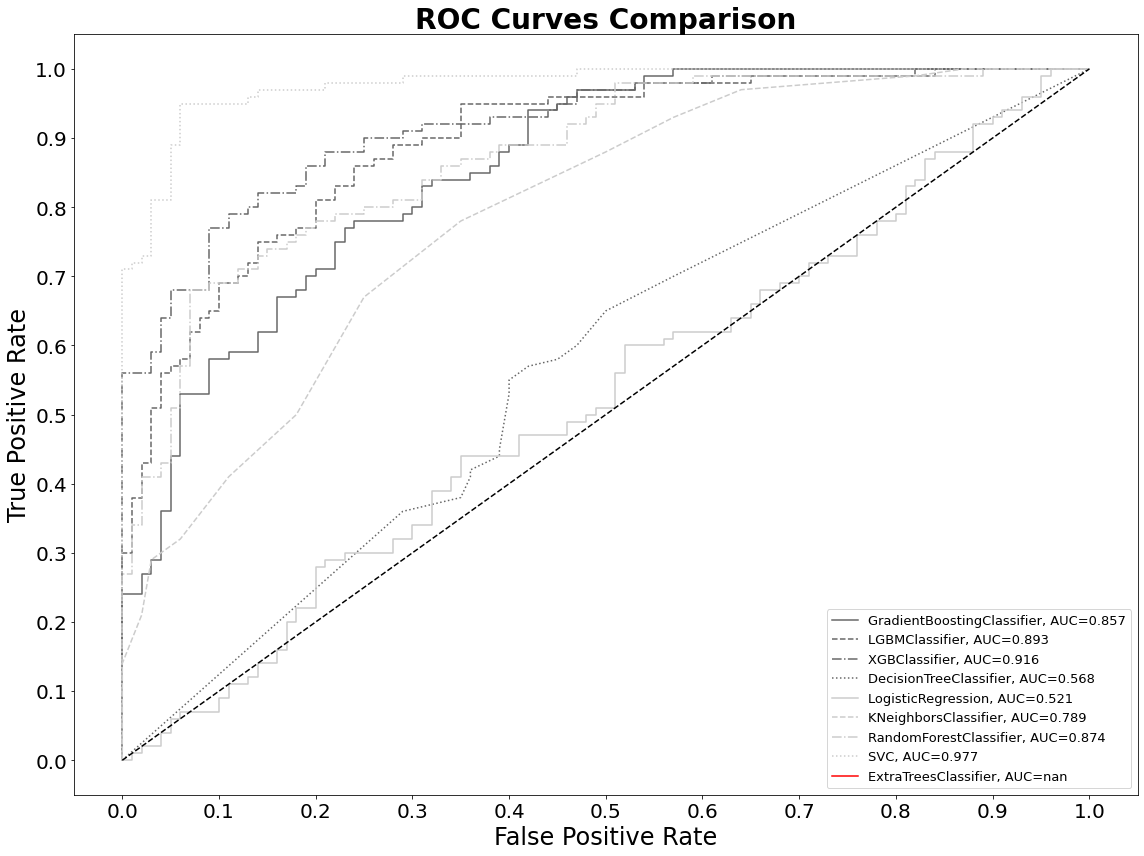

In [20]:
fig,ax=benchmark.plot_roc(dataset_name='digen10_8322', new_results=results)

In [ ]:
fig,ax=benchmark.plot_prc('digen18_5578', new_results=results)

In [ ]:
import digen

In [46]:
from xgboost import XGBClassifier
est=XGBClassifier()
results=benchmark.evaluate(est, datasets='digen8_4426', local_cache_dir='C:/Users/patrick/Desktop/datascience/digen/datasets/')

C:\ProgramData\Anaconda3\lib\site-packages\xgboost\sklearn.py:892: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[23:18:26] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


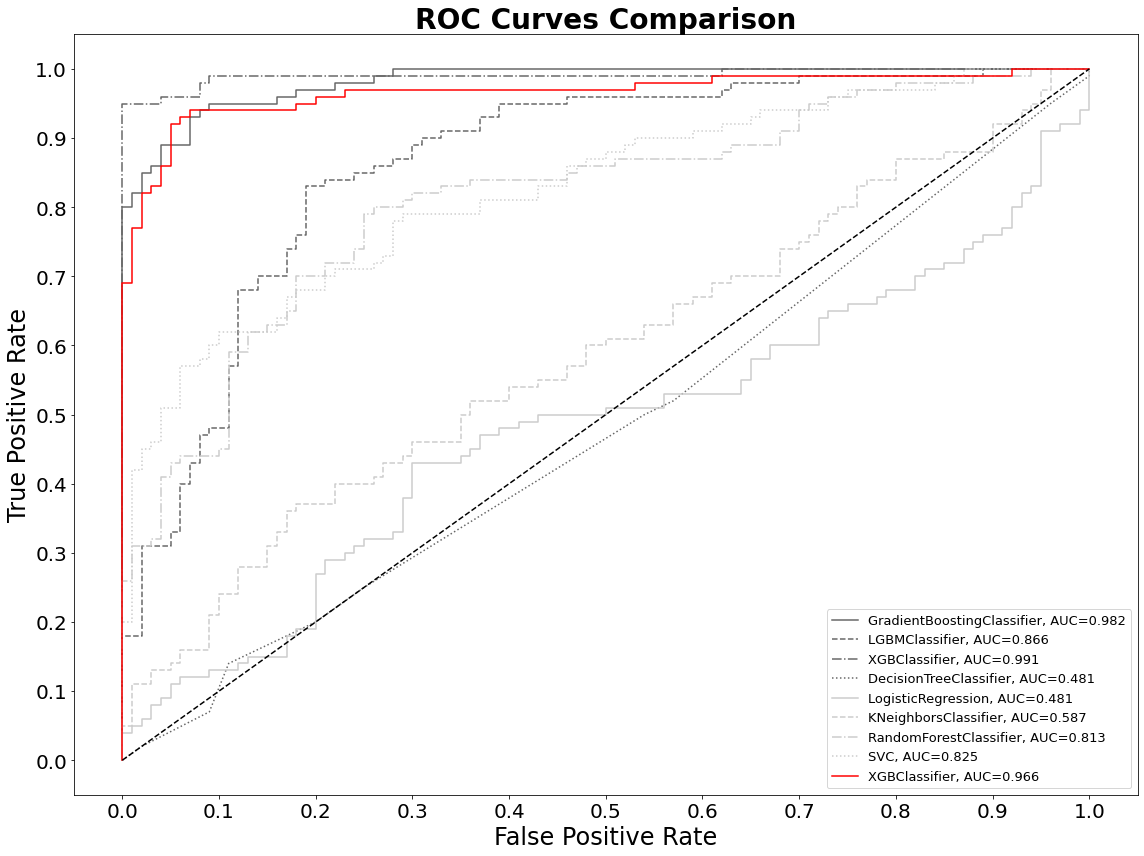

In [47]:
fig,ax=benchmark.plot_roc(dataset_name='digen8_4426', new_results=results)

Thank you for using our tutorial. 
For comments, suggestions etc. please use our GitHub page: https://github.com/EpistasisLab/digen/